In [ ]:
!apt updateapt update --quiet
!pip install mdbtools-dev --quiet
!apt-get install mdbtools --quiet
!pip install pandas pyodbc --quiet
!pip install tempfile2
import warnings
warnings.filterwarnings('ignore')


E: Invalid operation updateapt
ERROR: Could not find a version that satisfies the requirement mdbtools-dev (from versions: none)
ERROR: No matching distribution found for mdbtools-dev
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libmdb3 libmdbsql3
Suggested packages:
  bash-completion
The following NEW packages will be installed:
  libmdb3 libmdbsql3 mdbtools
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 136 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmdb3 amd64 1.0.0+dfsg-1 [68.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmdbsql3 amd64 1.0.0+dfsg-1 [18.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 mdbtools amd64 1.0.0+dfsg-1 [48.3 kB]
Fetched 136 kB in 0s (815 kB/s)
Selecting previously unselected package libmdb3:amd64.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Dev/py2/')
import numpy as np

import pandas as pd
from google.colab import files
import os
import subprocess
from io import StringIO  # StringIOを正しくインポート
import model.utility.k_analysis_util as k_a_util
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

# 使用例
table_name = 'TargetEncodingVariables'  # テーブル名を指定

file_list = [f'kjdb_prediction_cache_{year}.accdb' for year in range(2000, 2025)]
years = range(2000, 2025)

k_a_util.prepare_pd_on_notebook()
print(len(file_list))

dict_statistics={}
for y in years:
  filepath = f'/content/drive/MyDrive/Dev/Kjvan/kjdb_prediction_cache_{y}.accdb'
  df_summary = k_a_util.read_table(filepath, table_name)
  columns_to_drop = [ 'te_id','te_race','te_horse_id', 'upd']
  df = df_summary.drop(columns=columns_to_drop)
  dict_statistics[y] = df

25


In [ ]:
print(len(dict_statistics[2000].columns))

te_D0714


<Figure size 640x480 with 0 Axes>

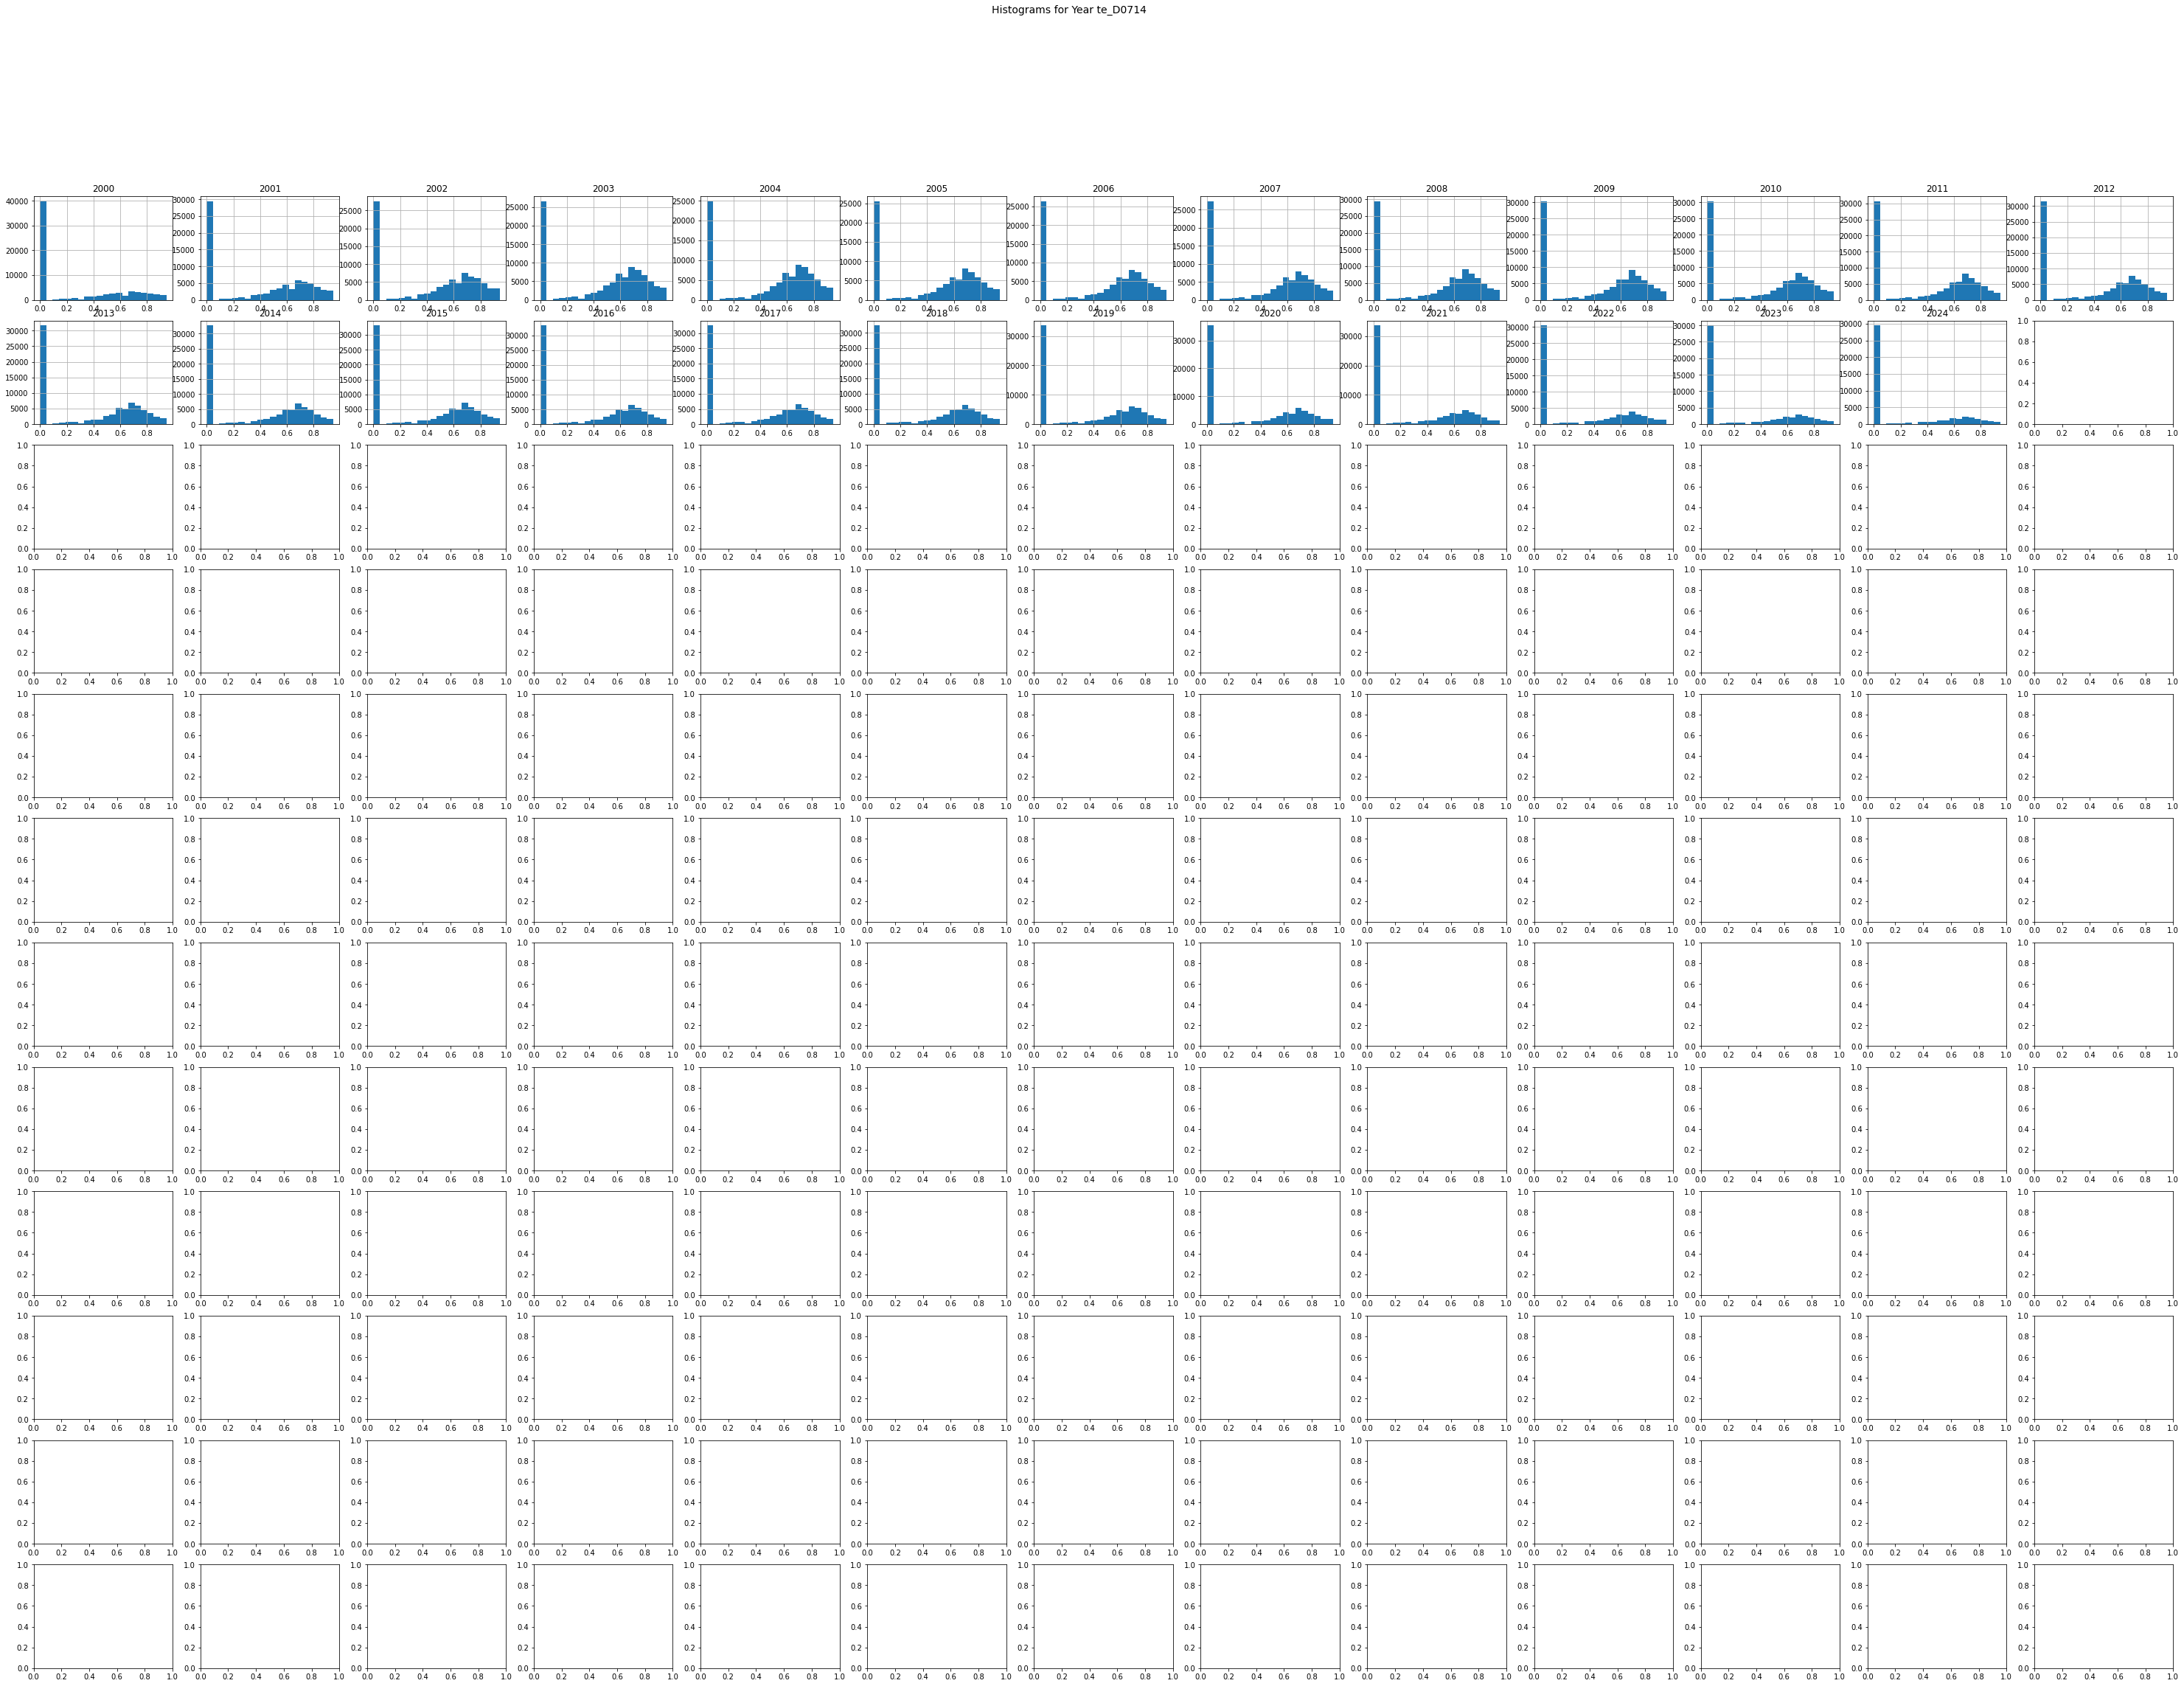

te_D1418


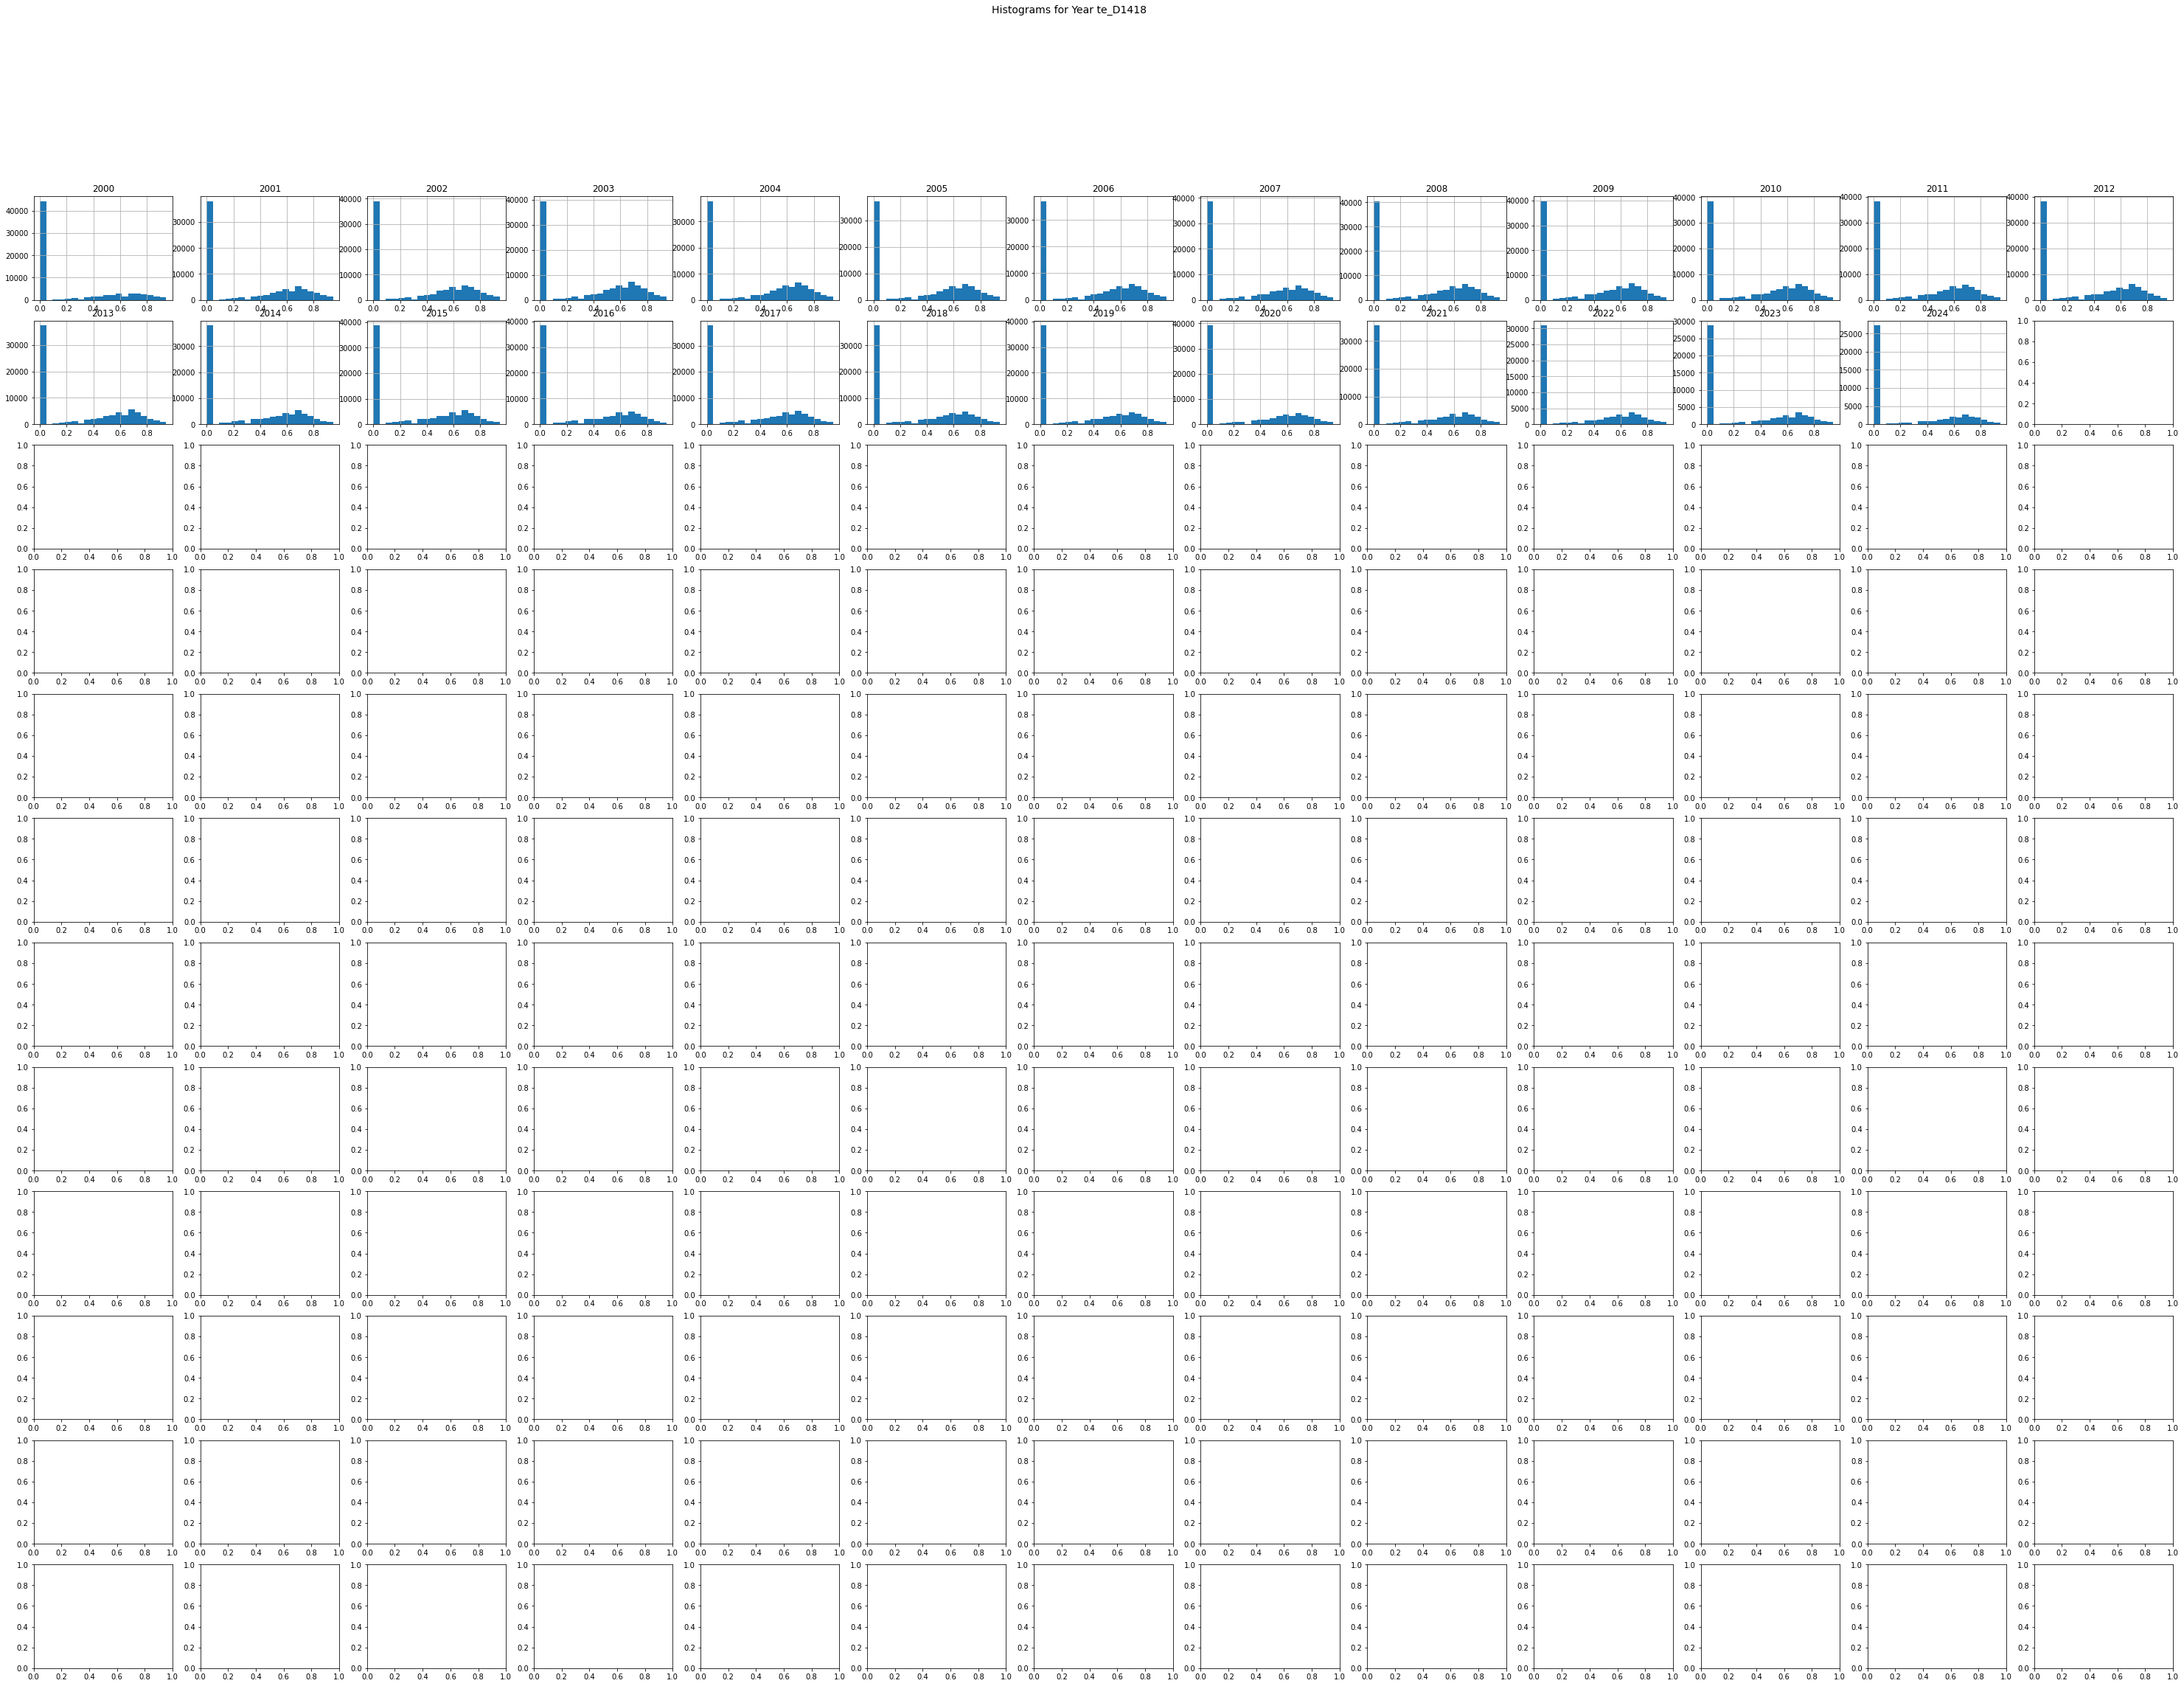

te_D1823


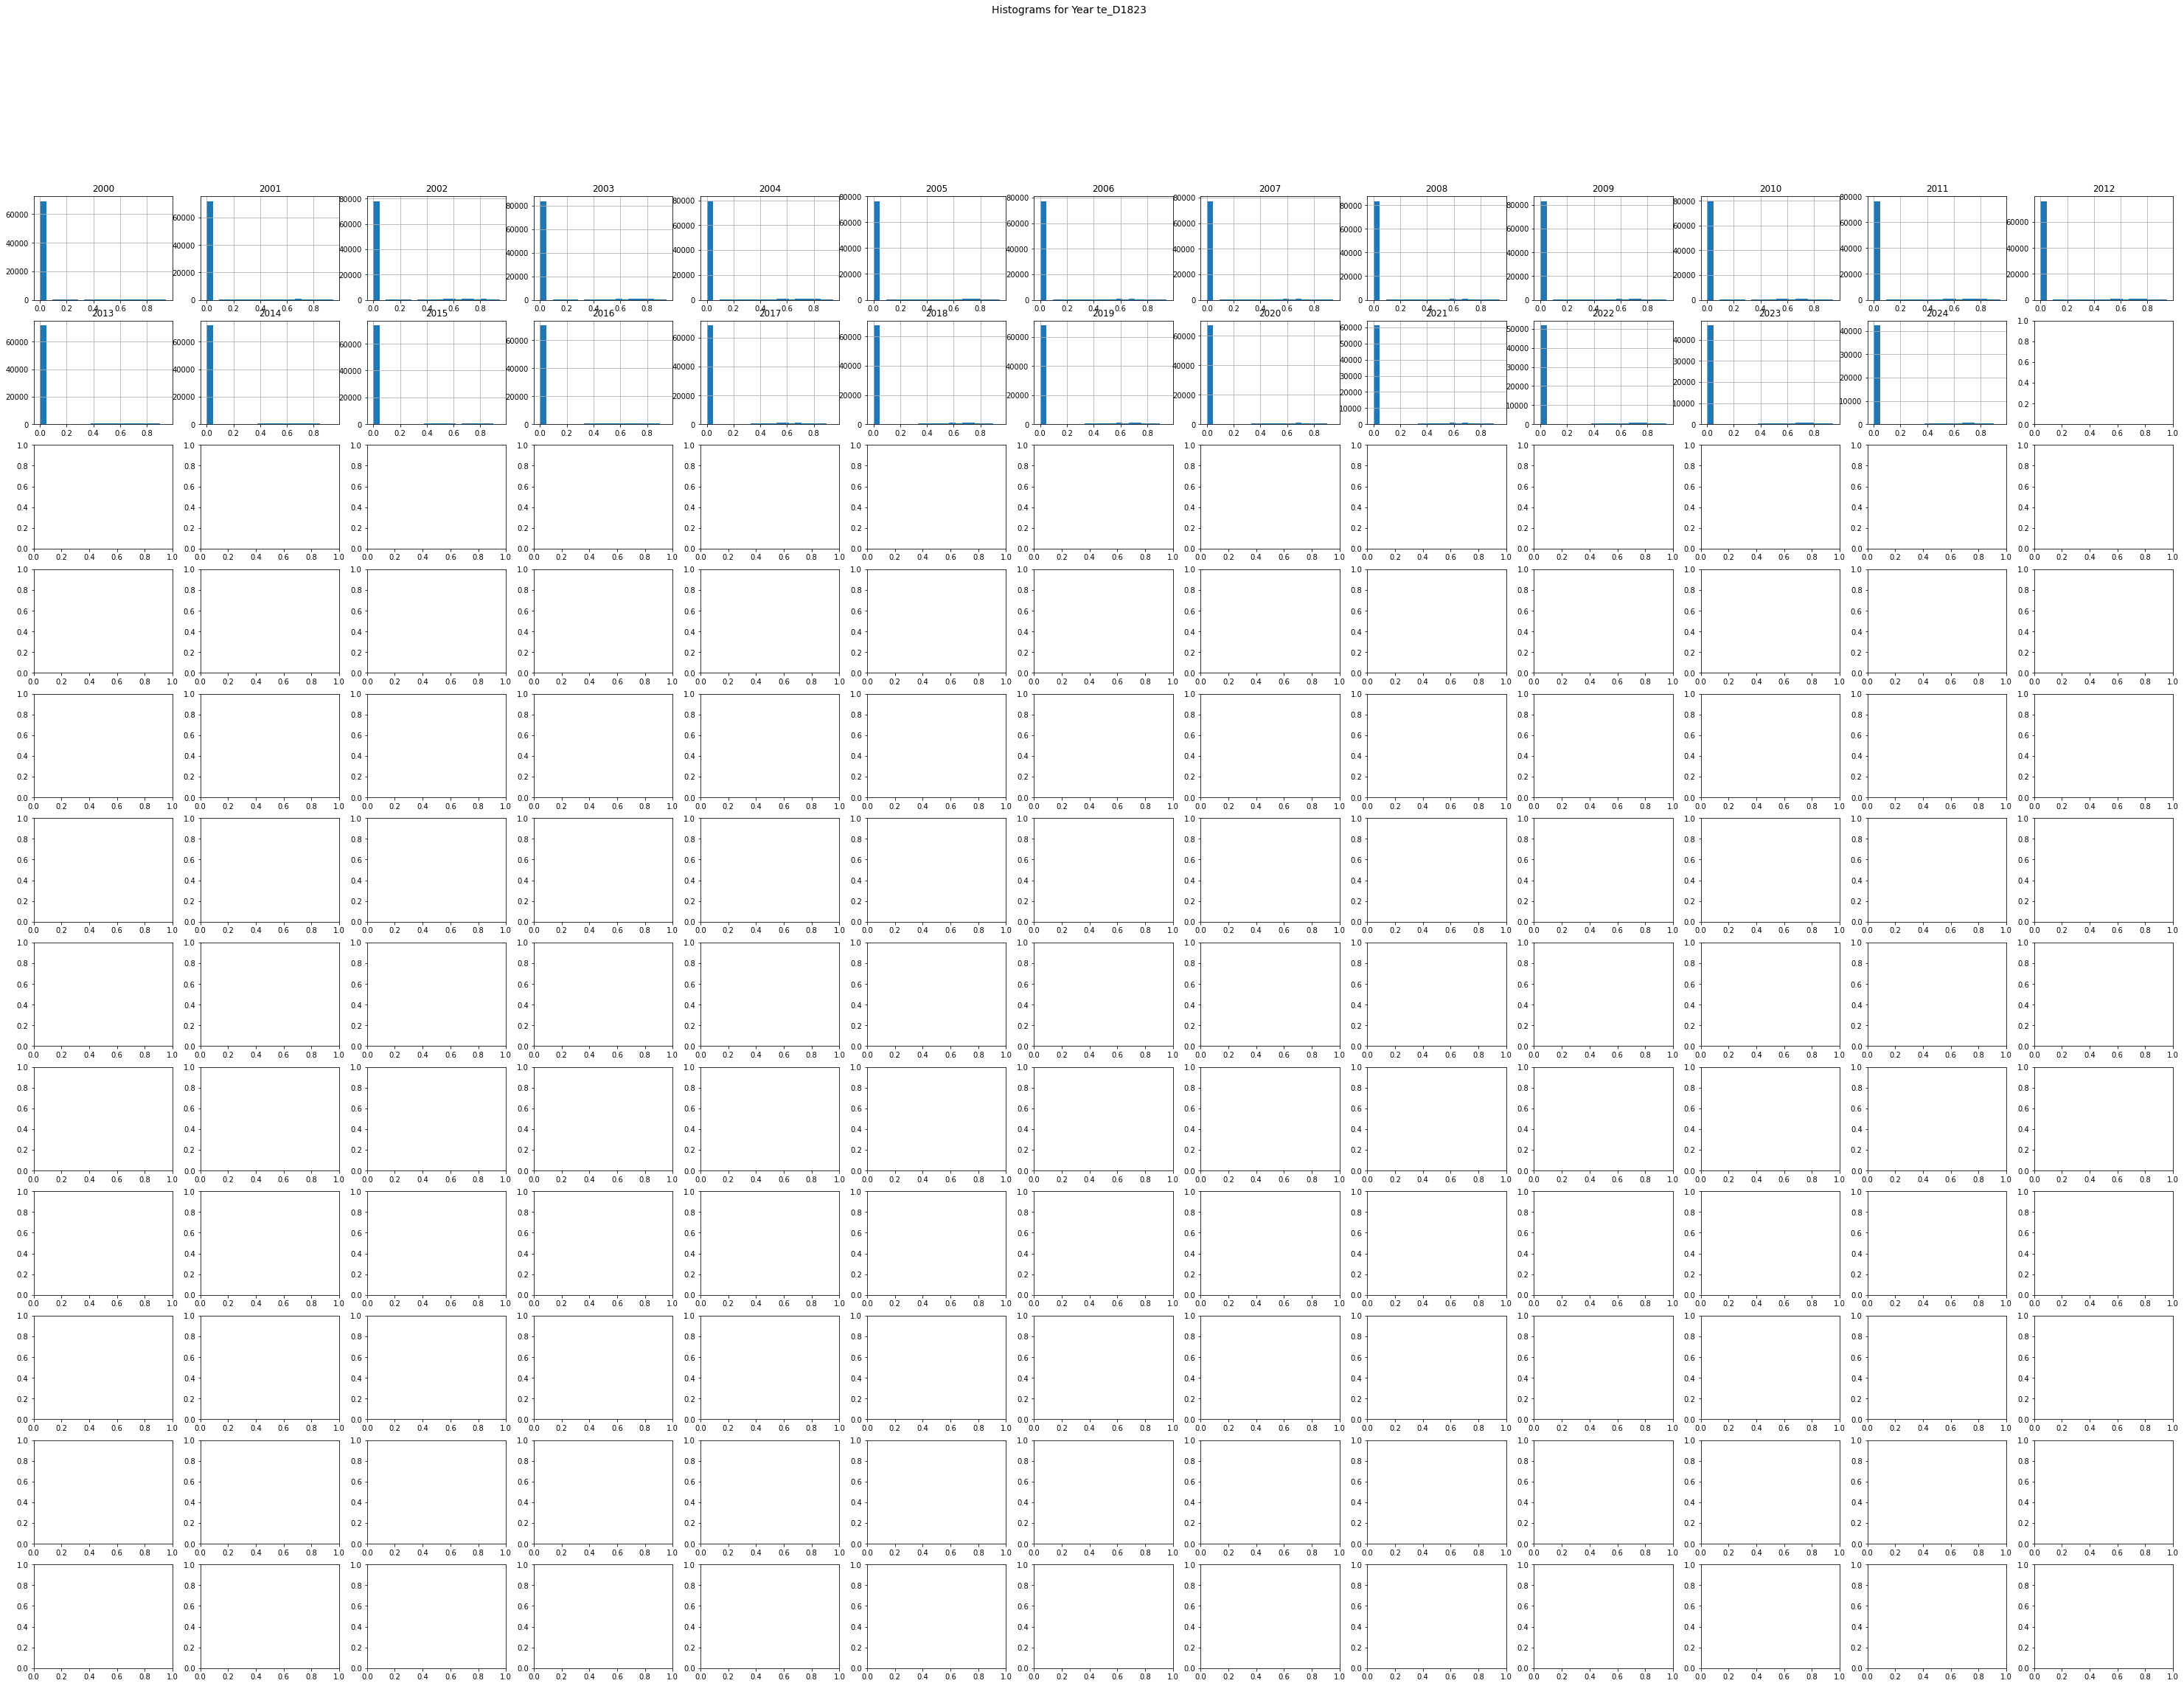

te_D2330


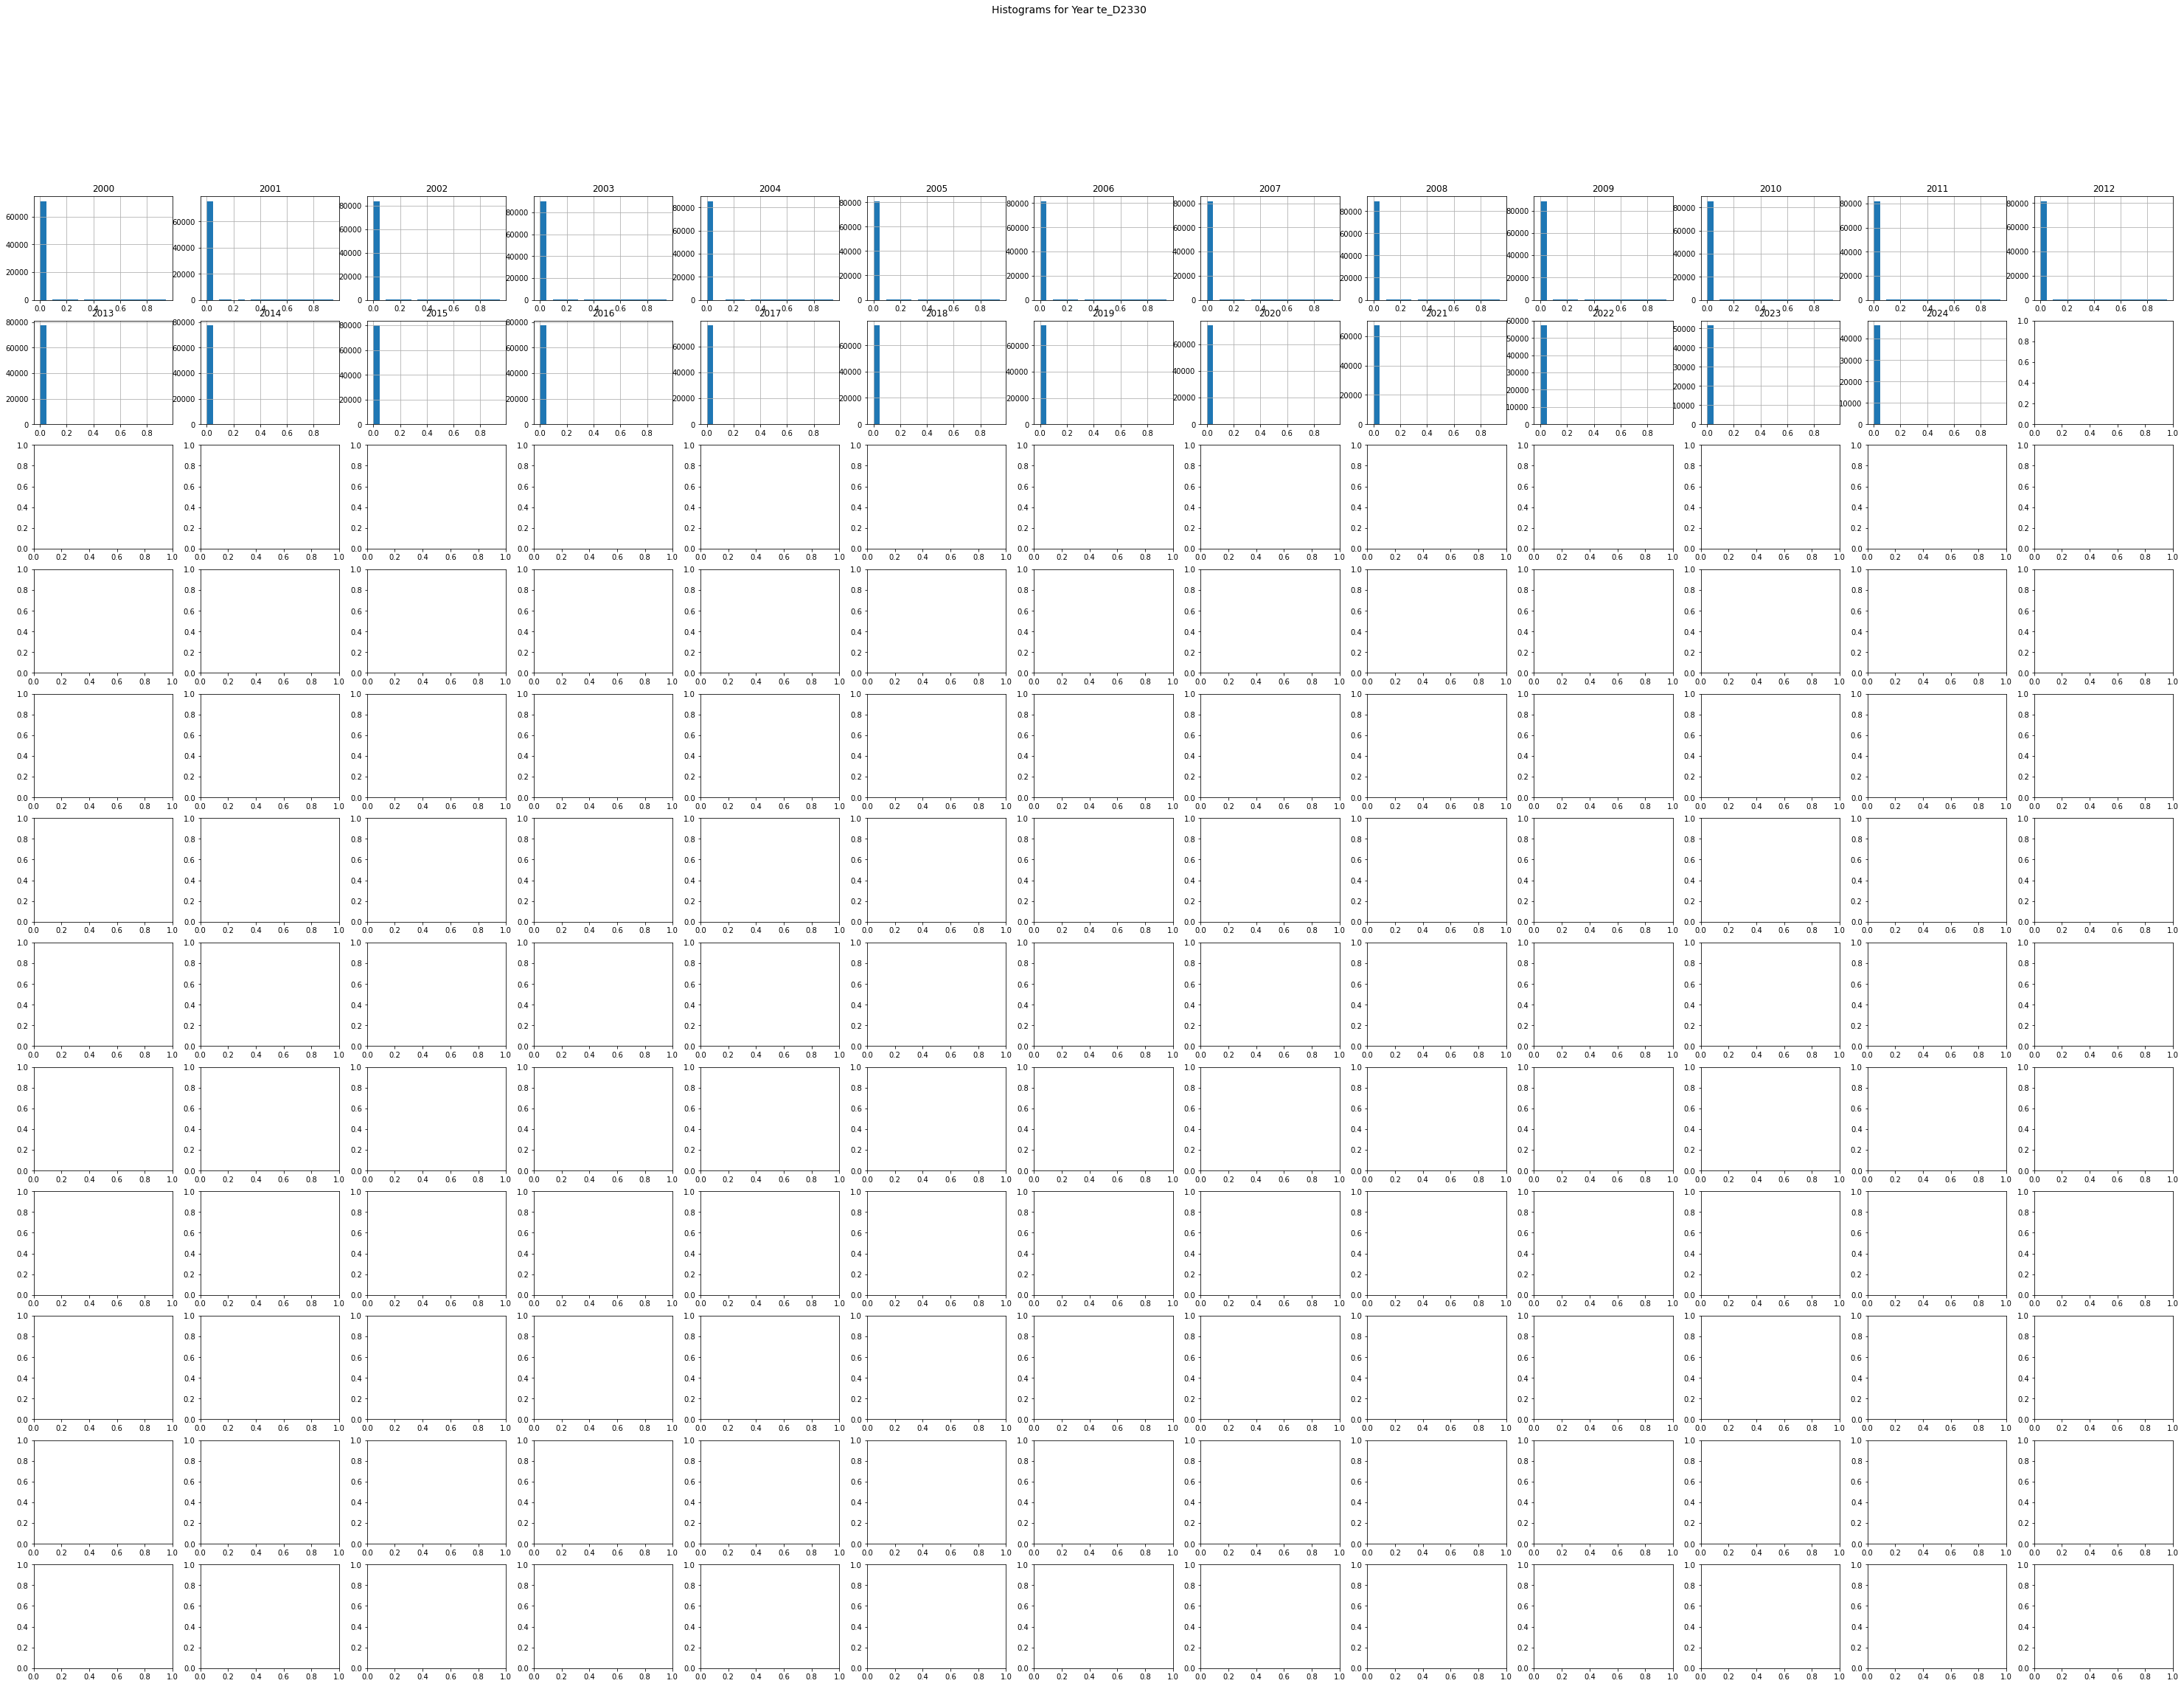

te_D30OV


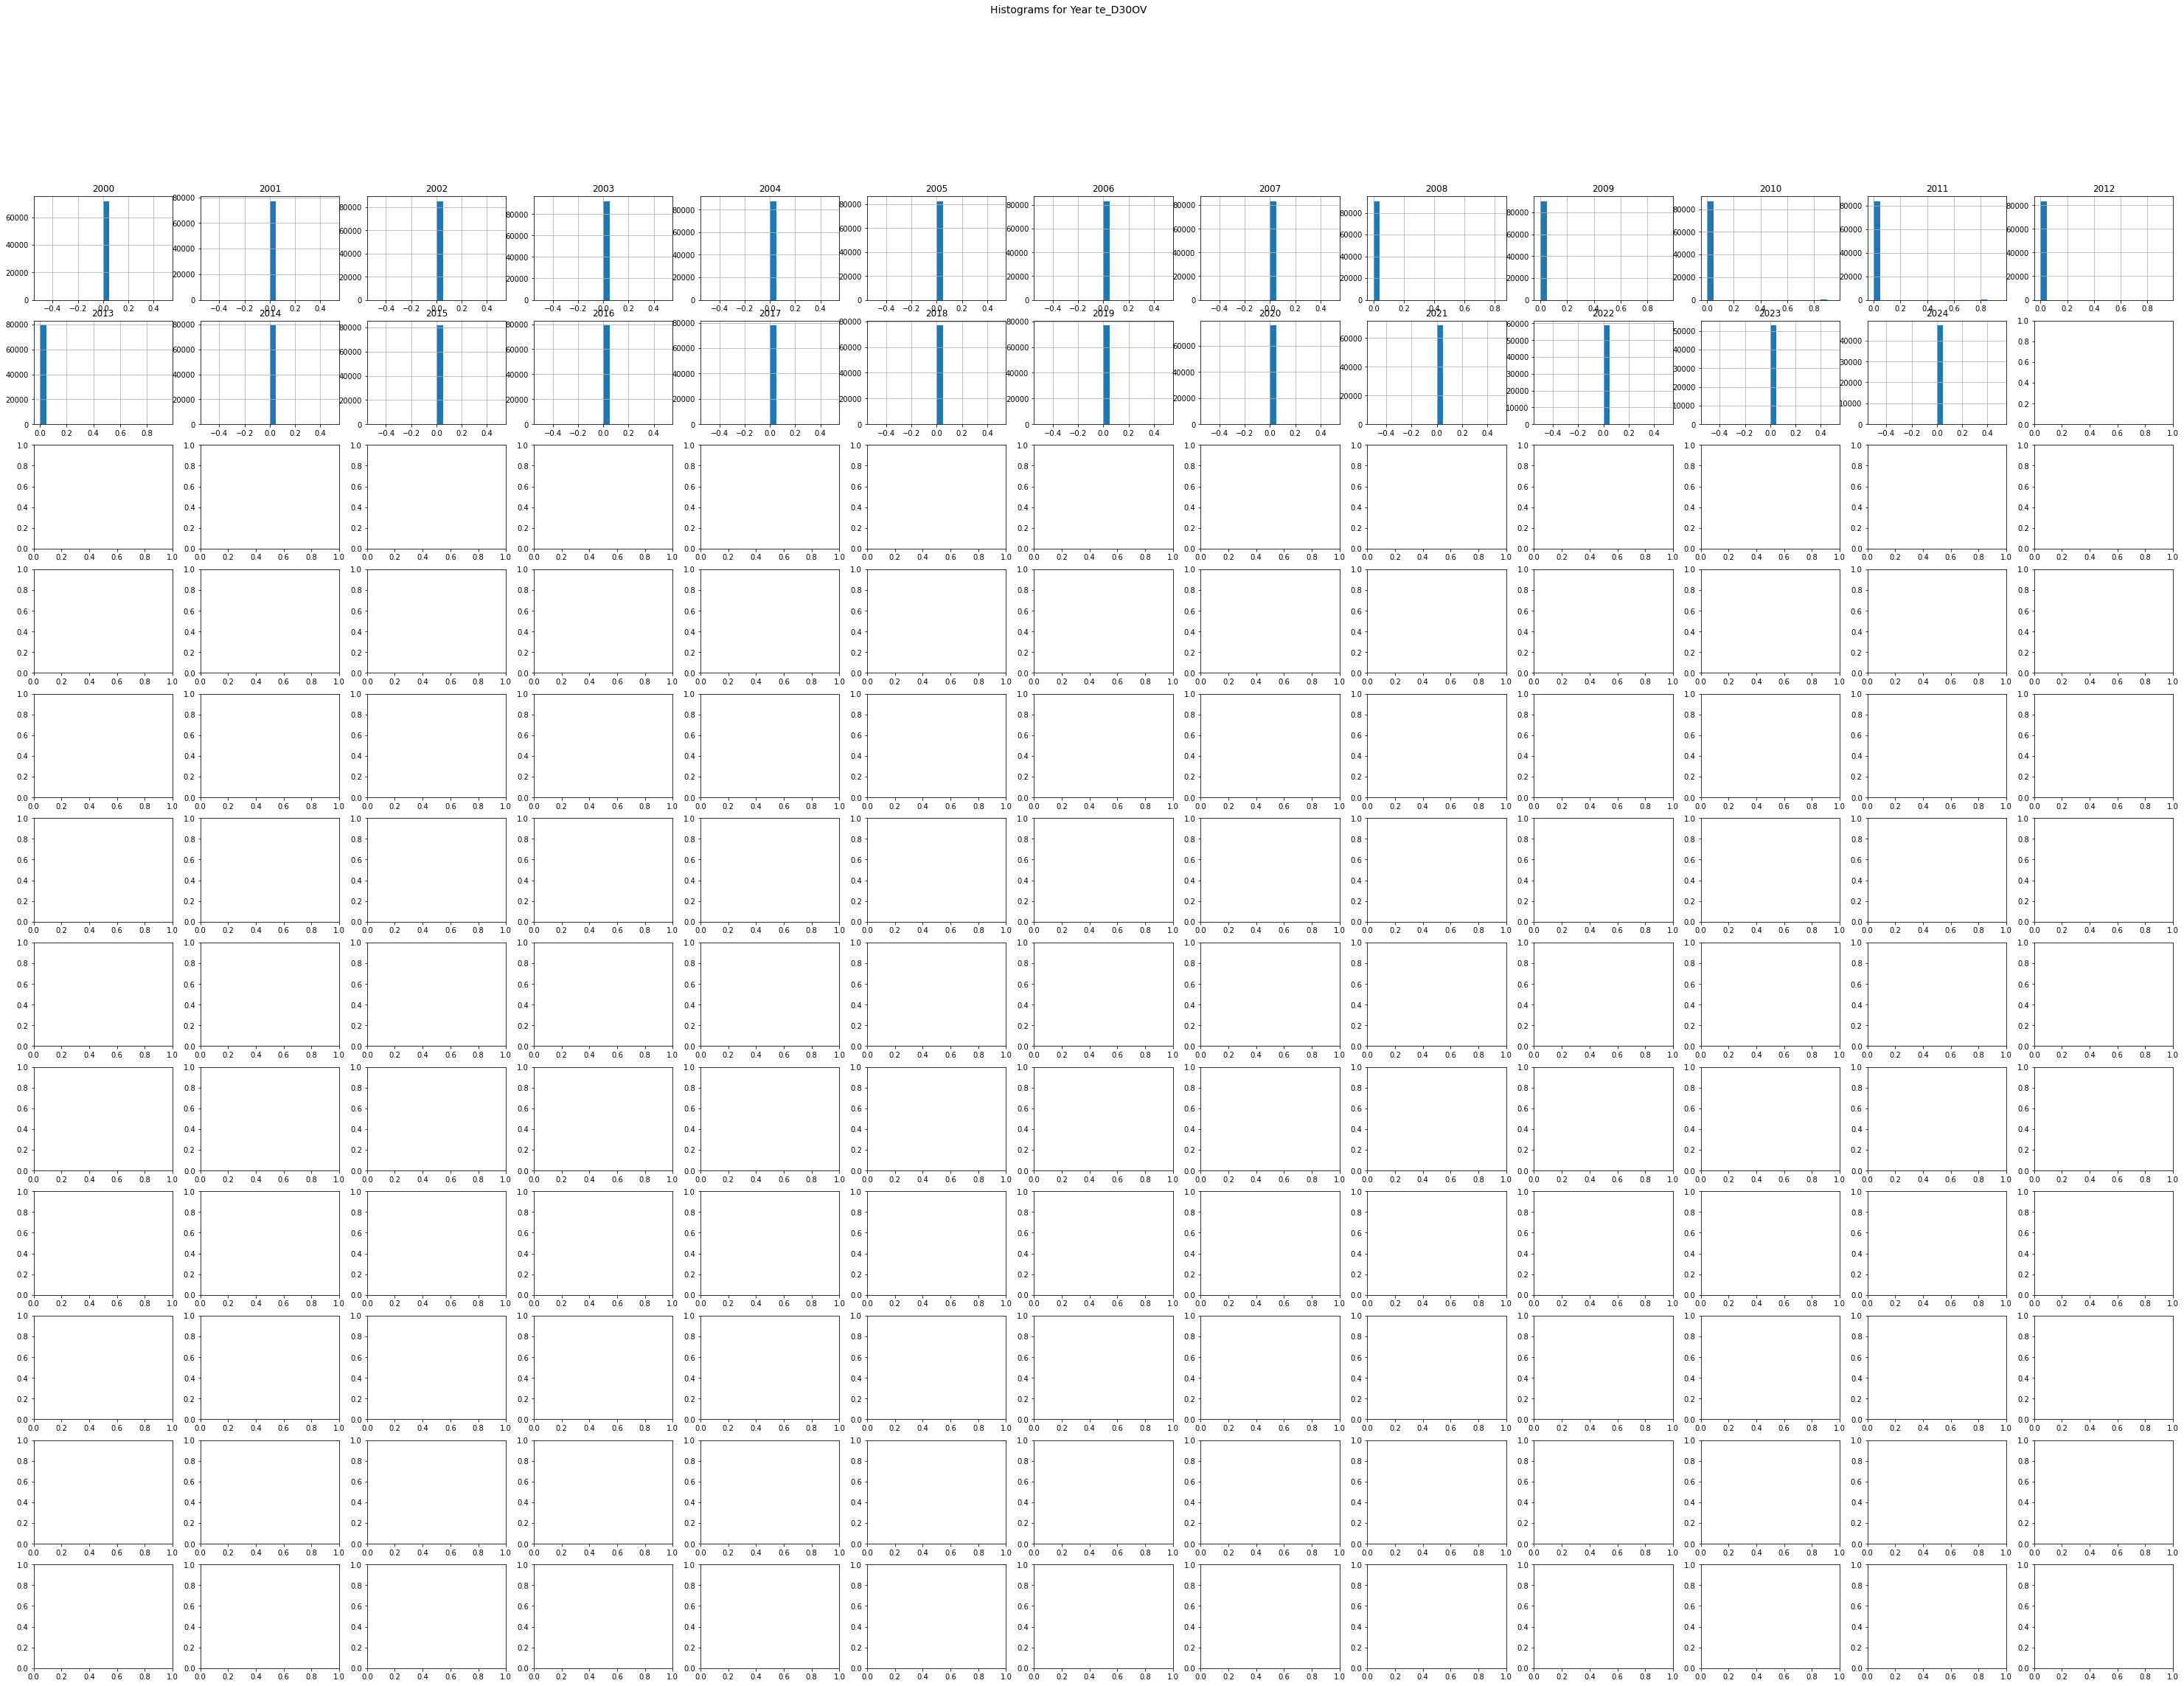

te_T0714


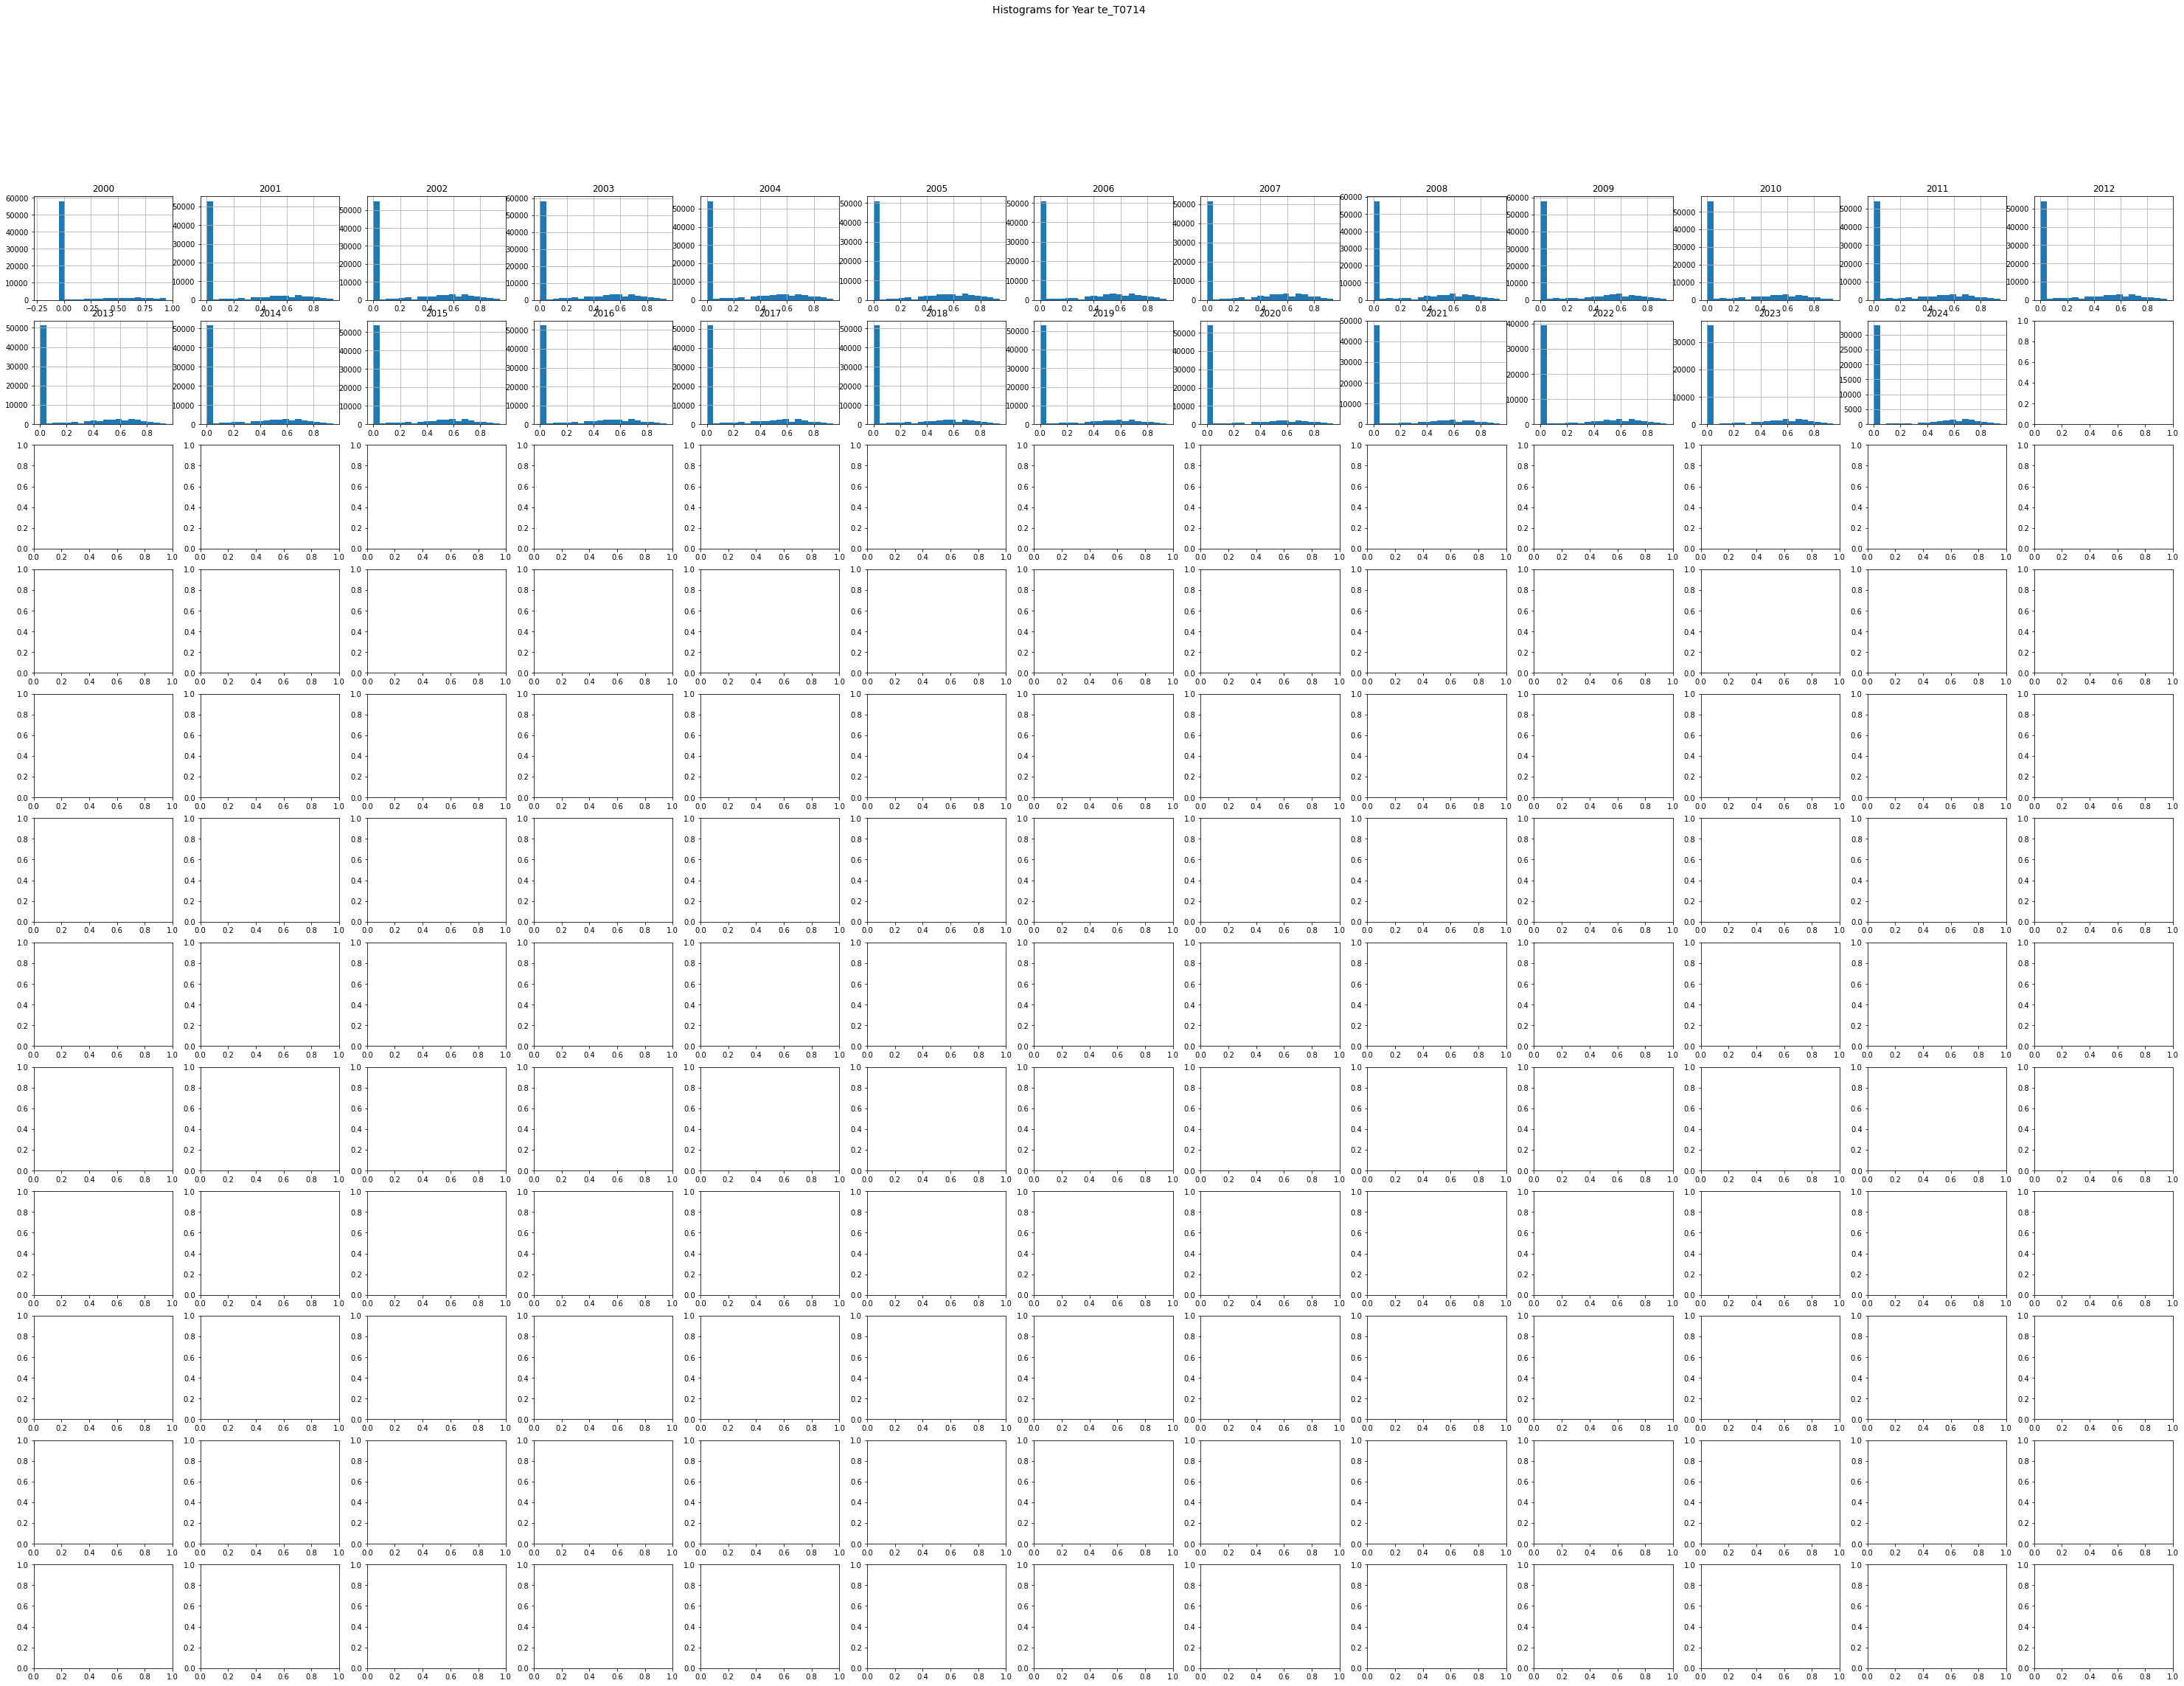

te_T1418


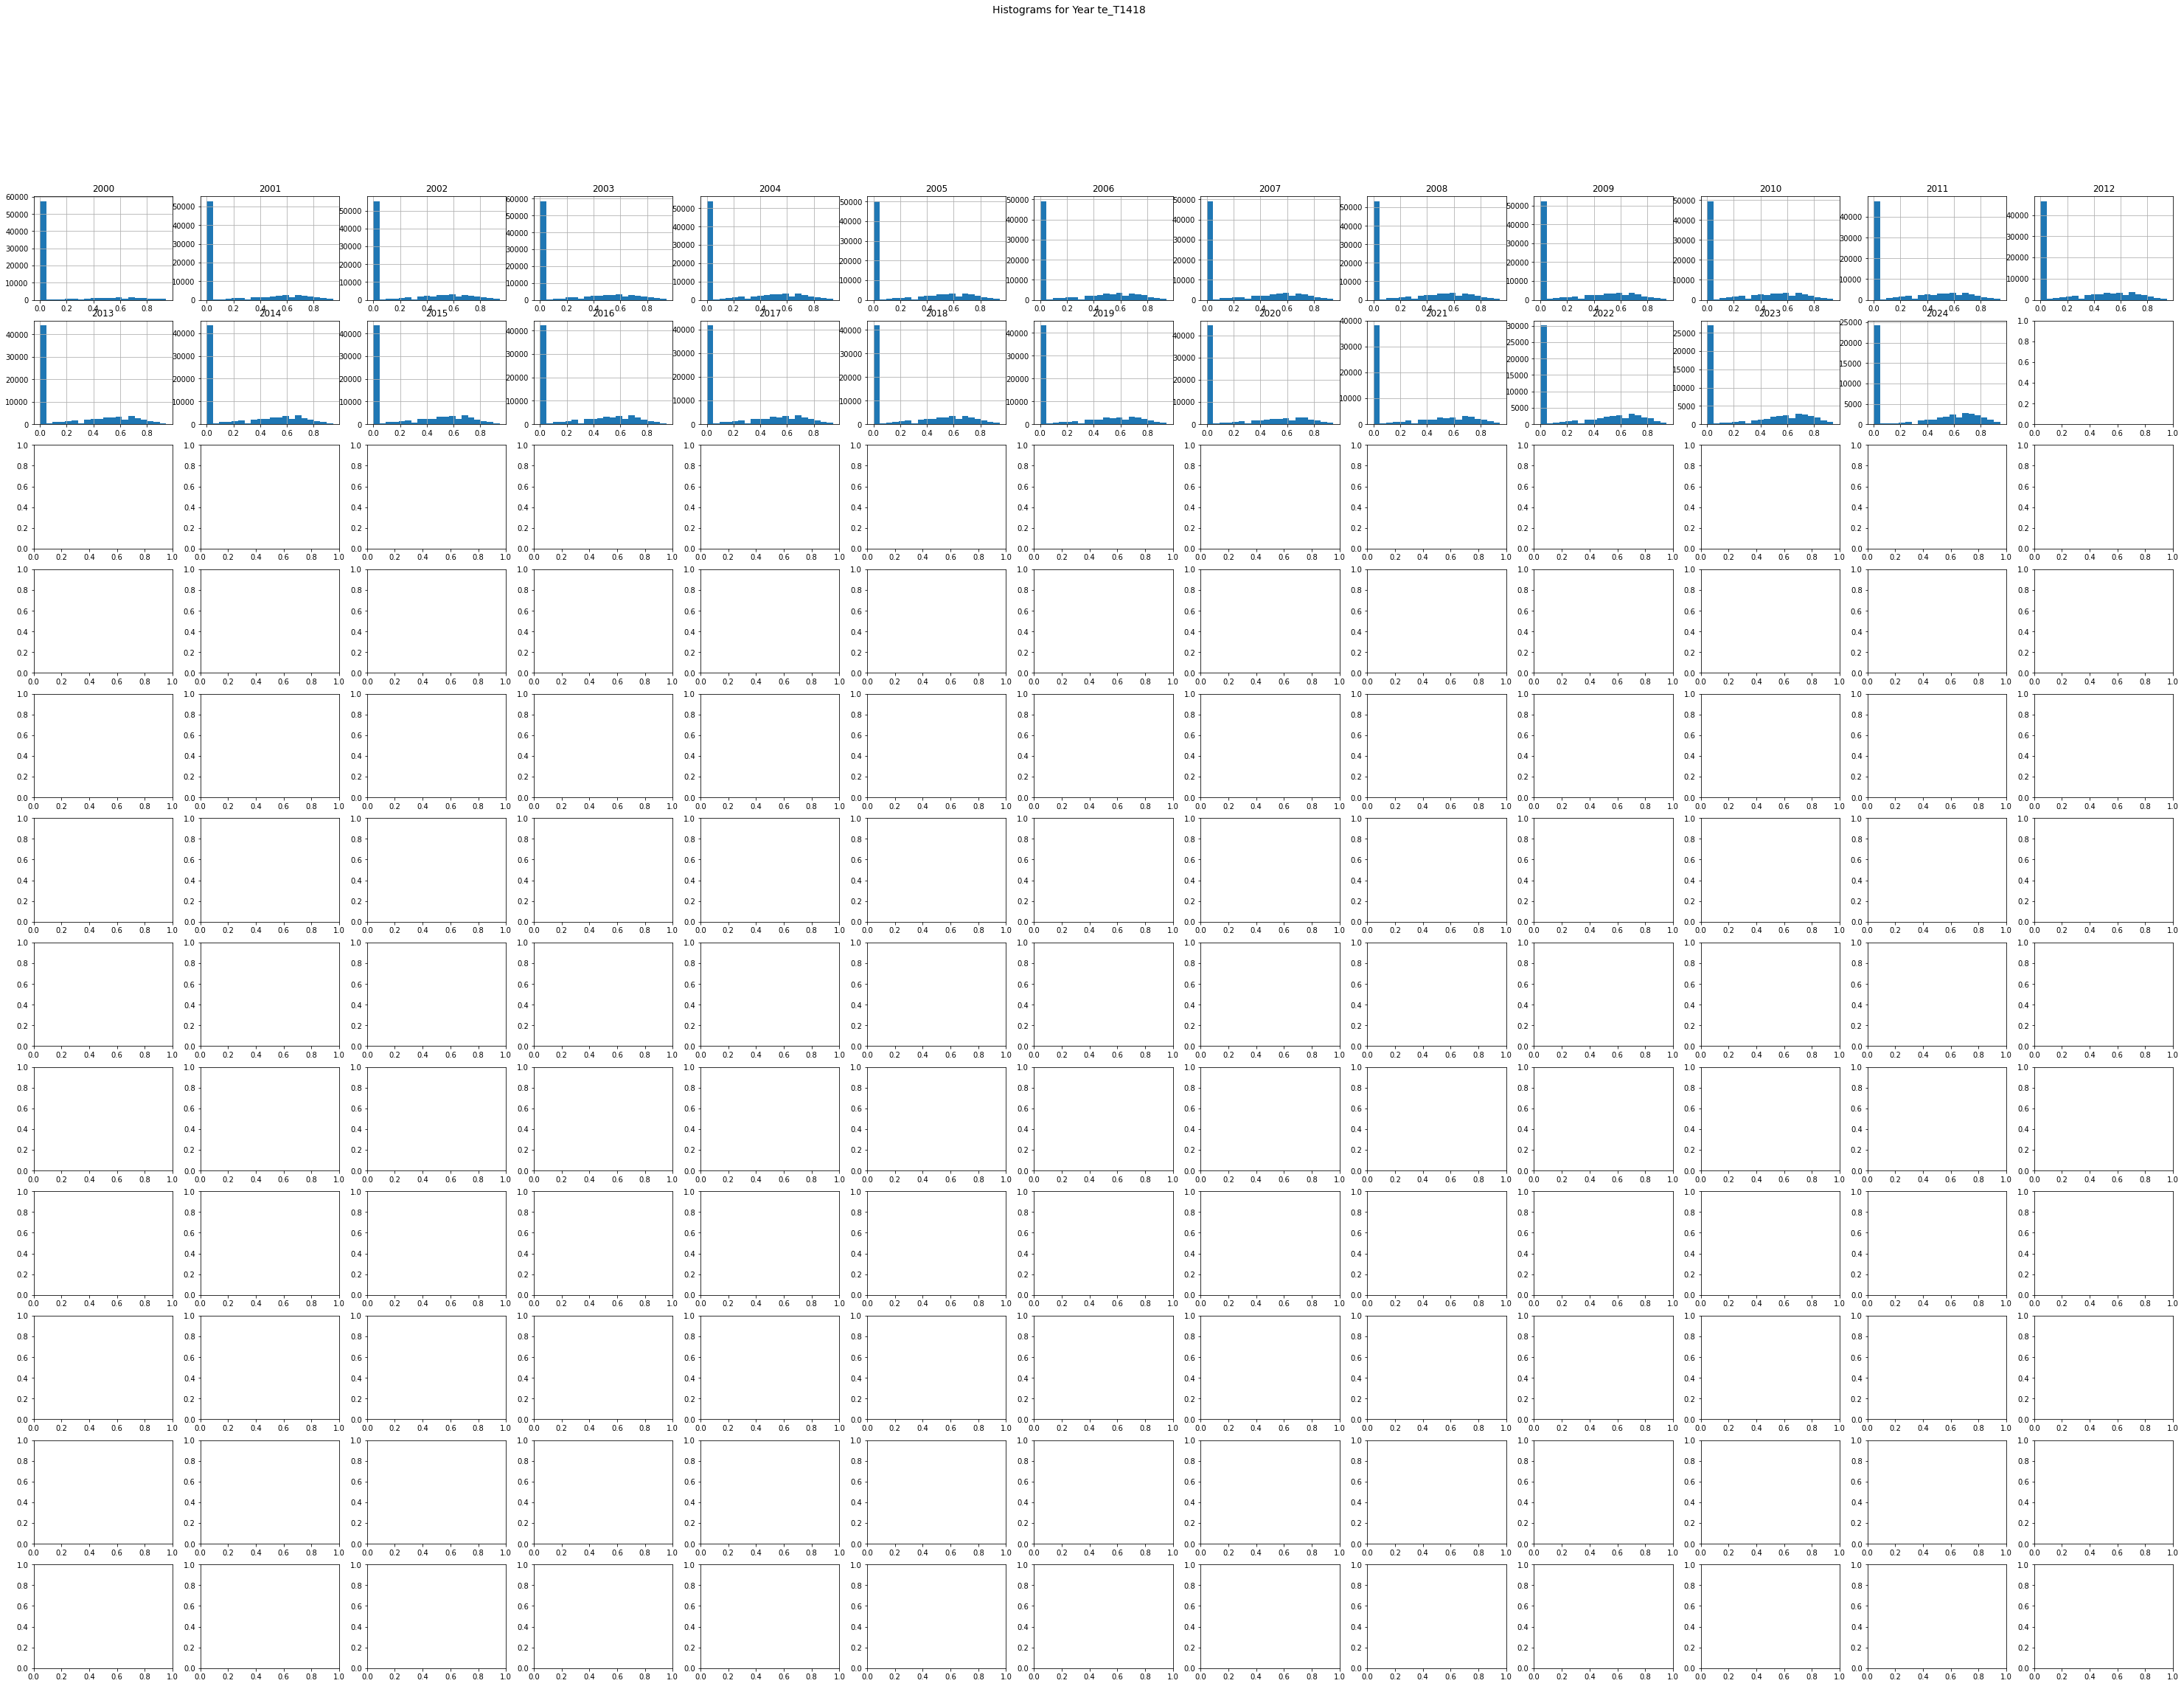

te_T1823


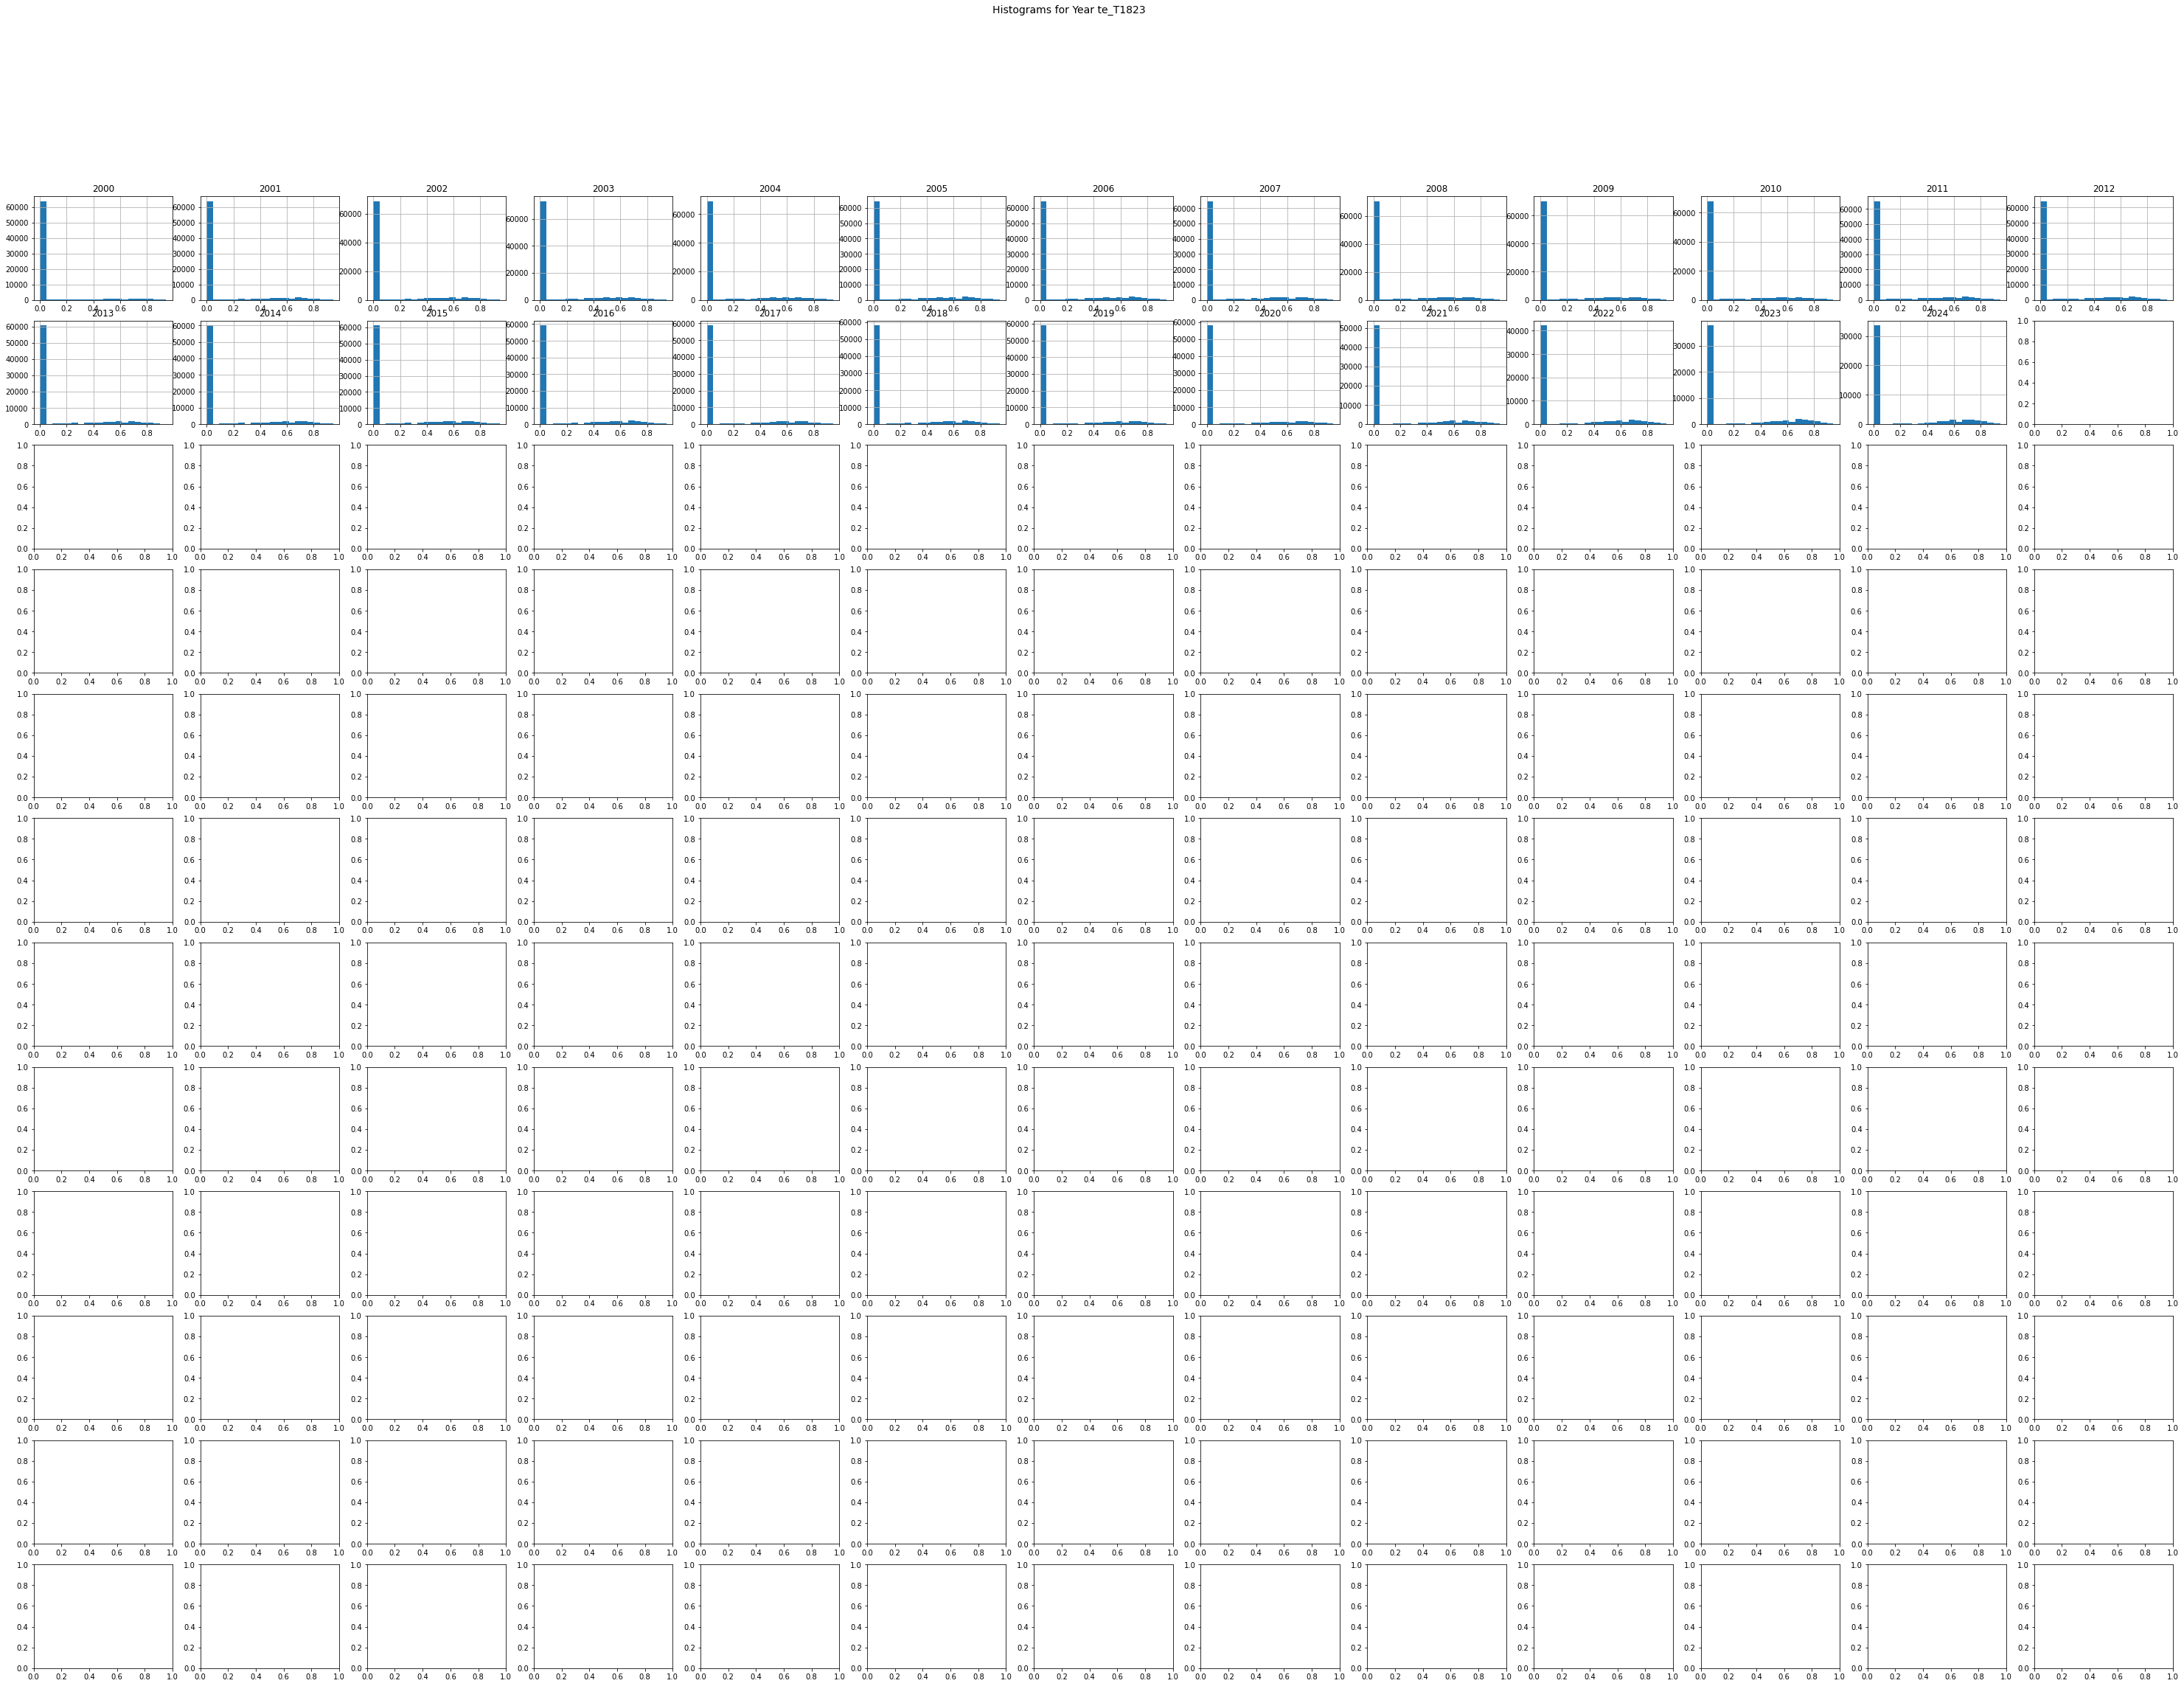

te_T2330


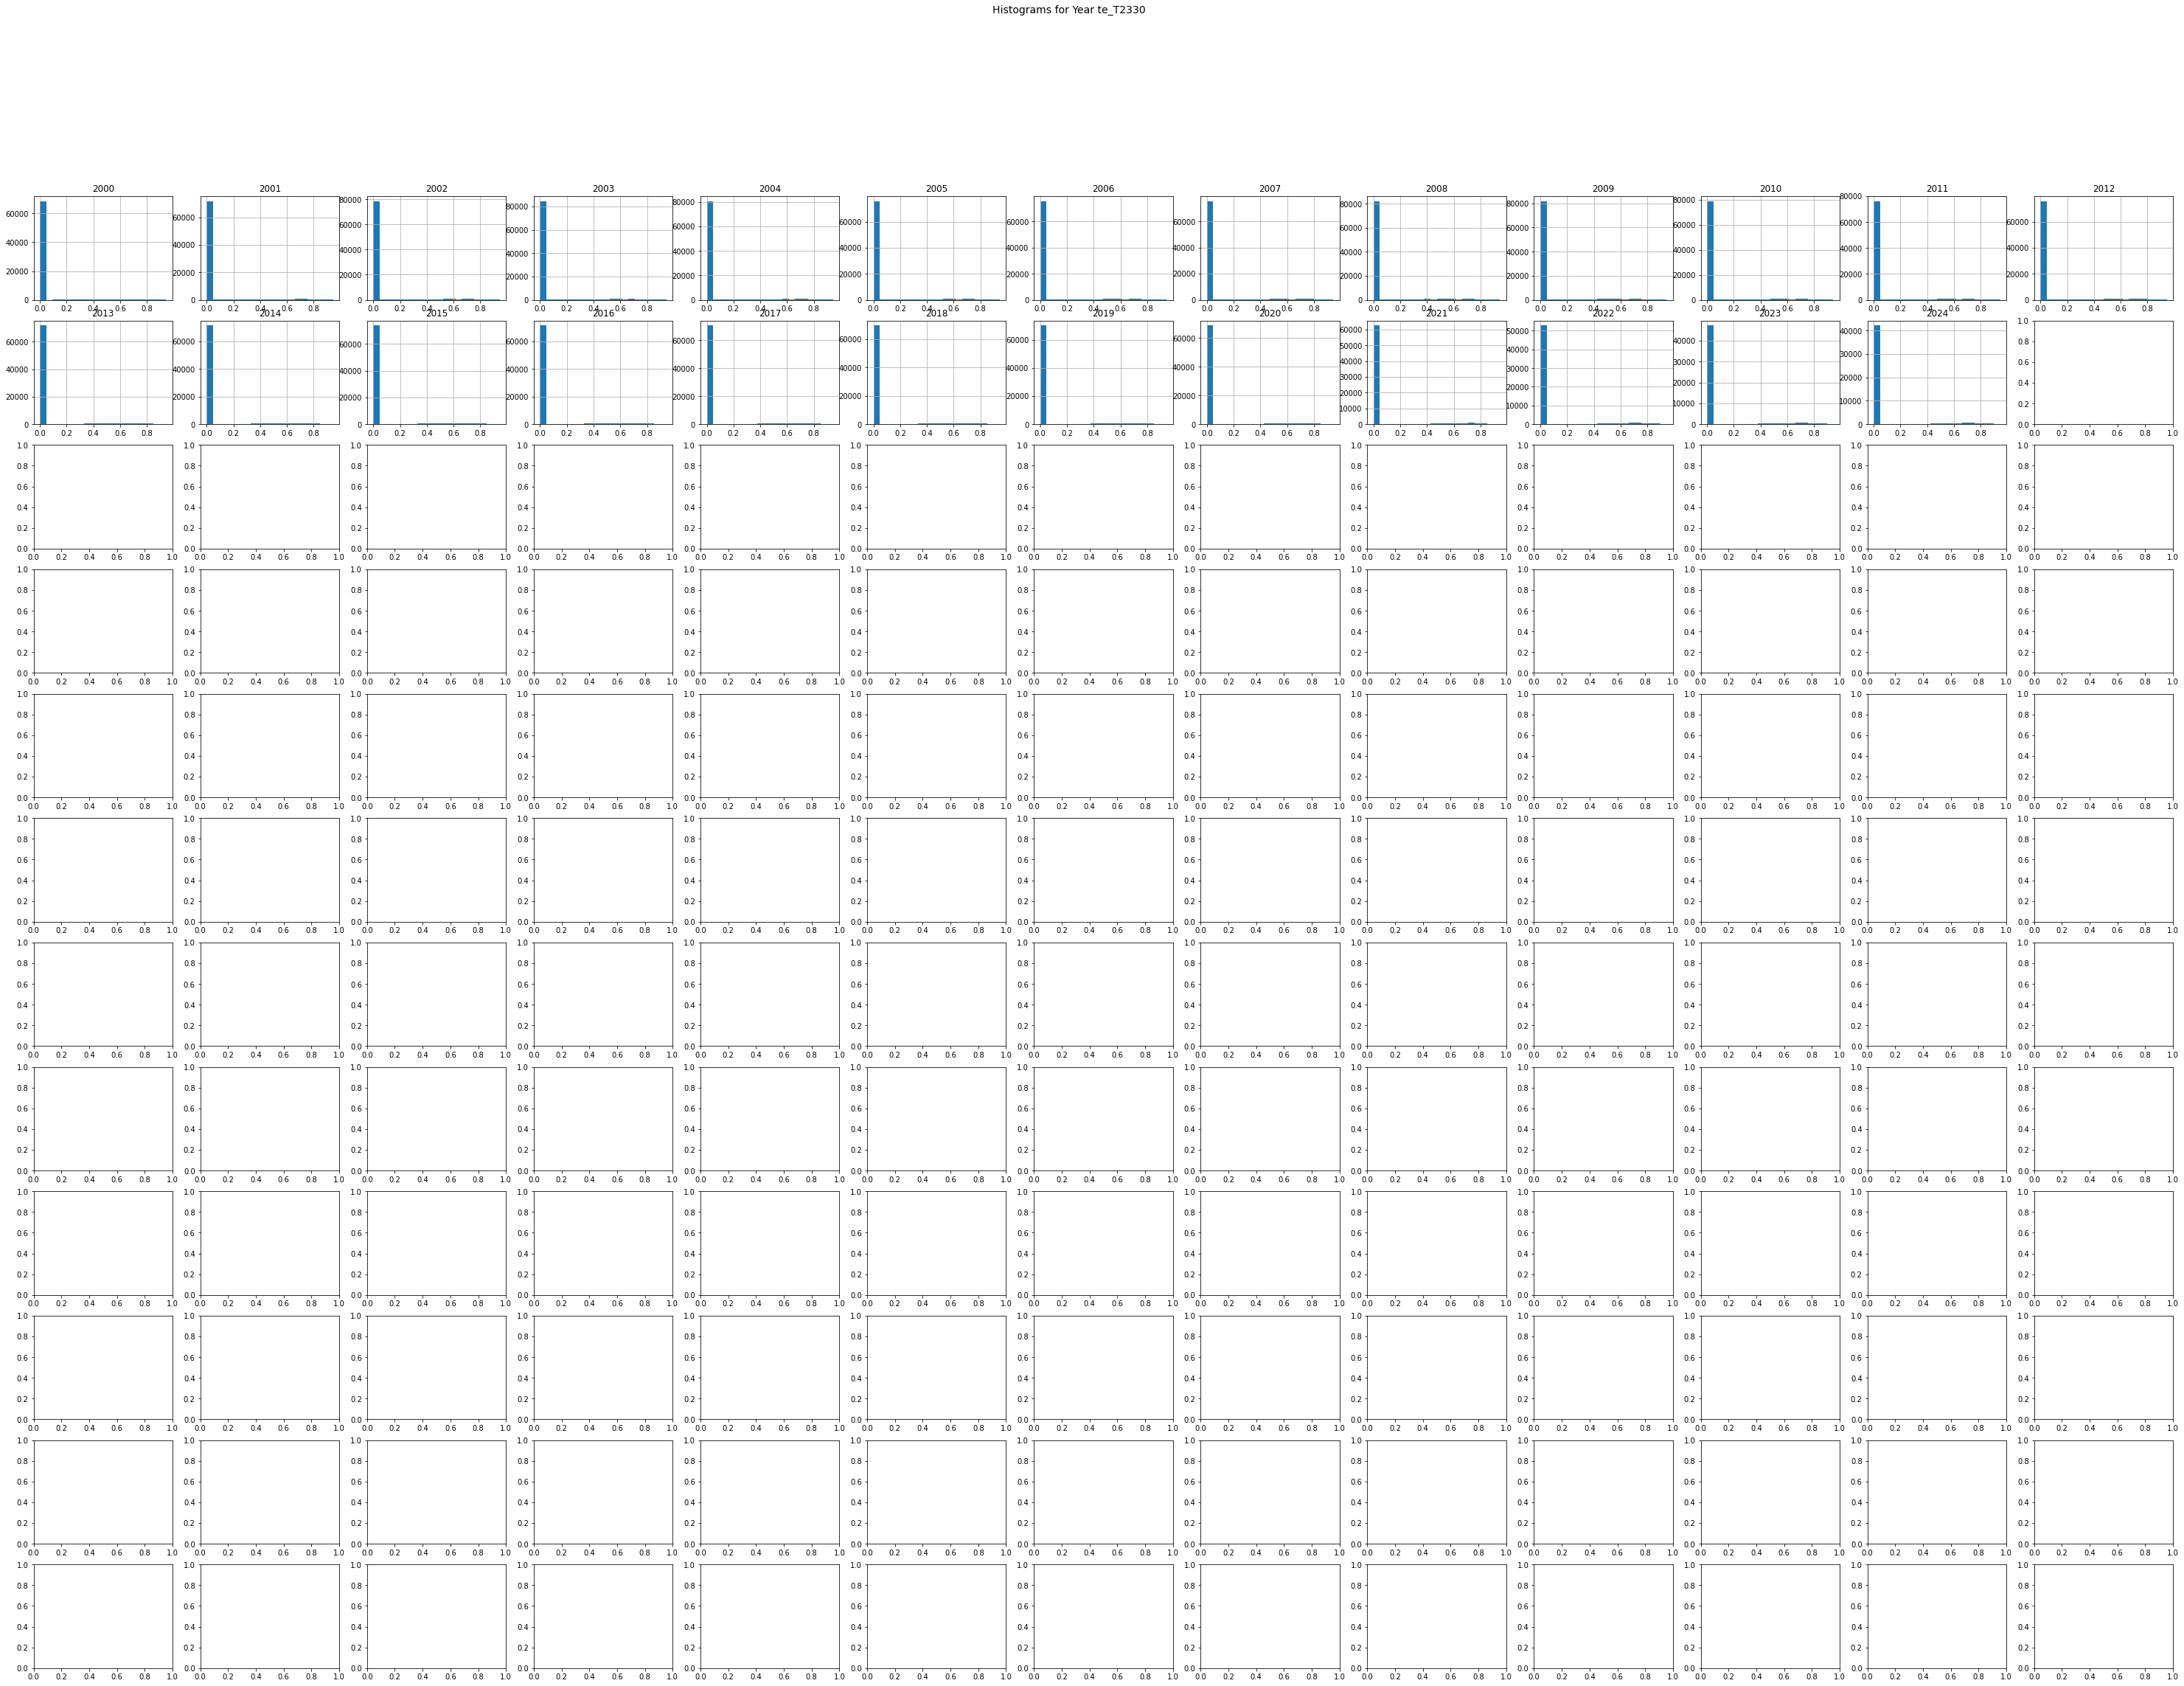

te_T30OV


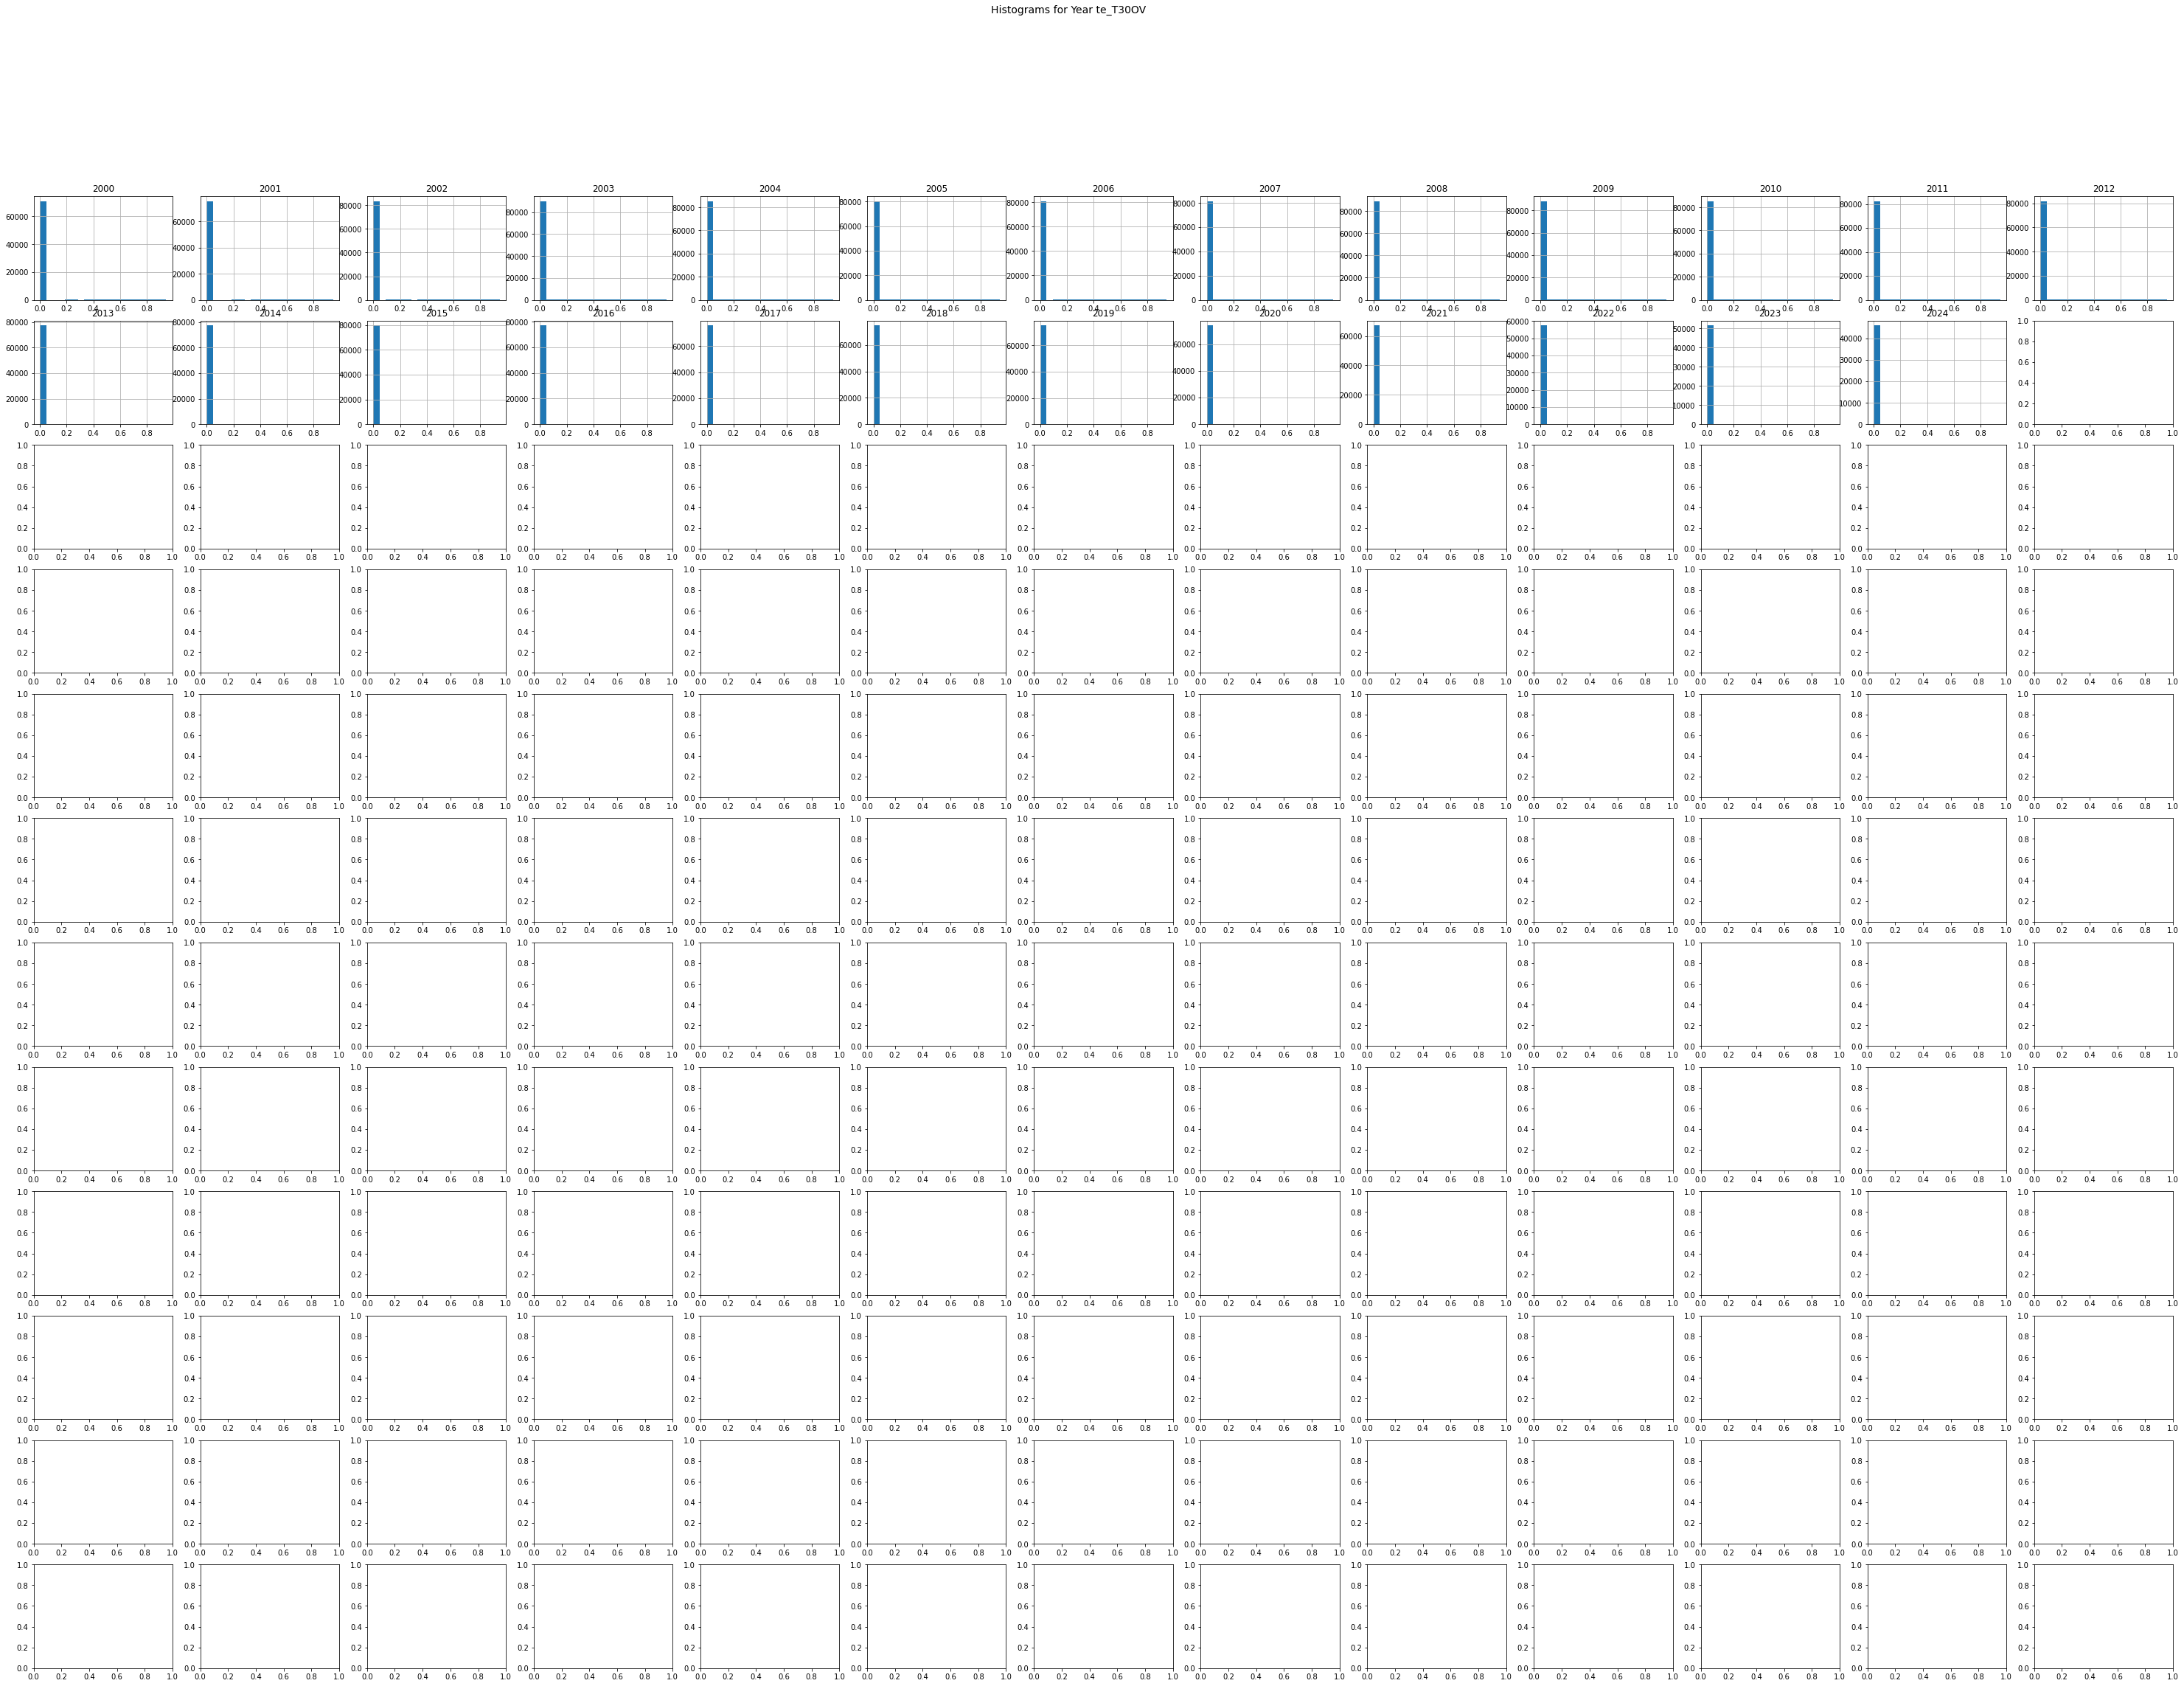

te_09T1823


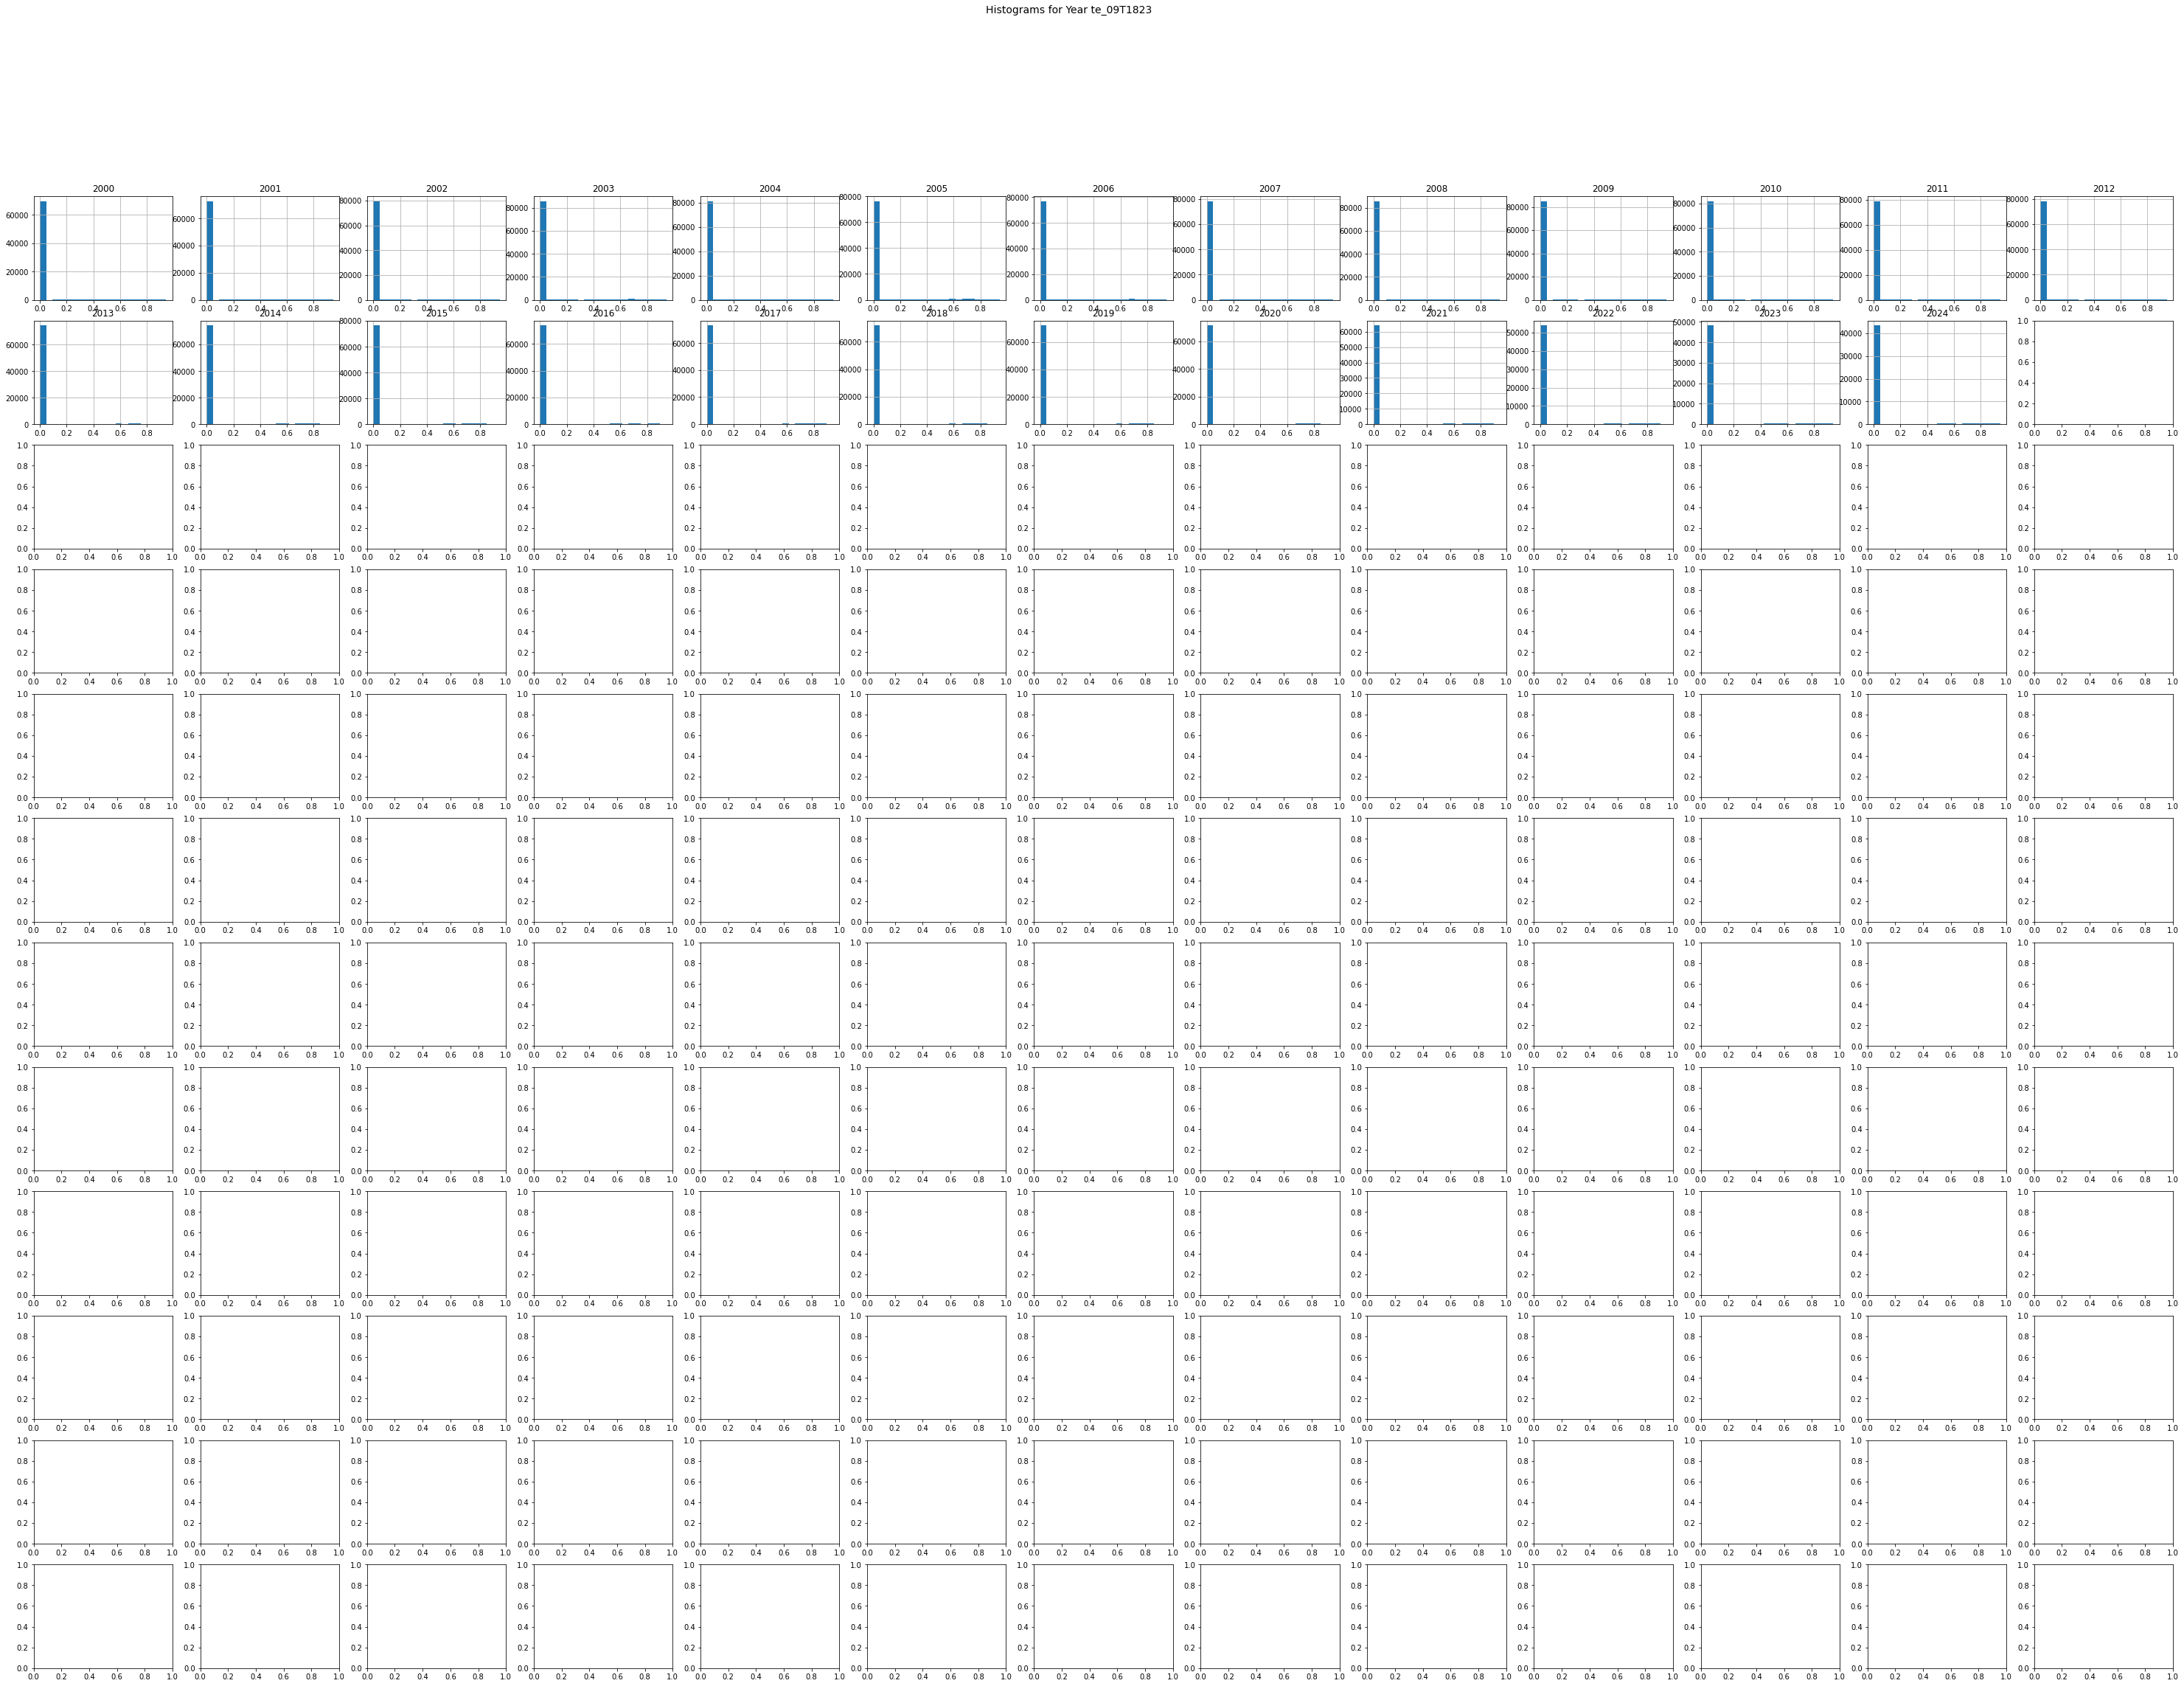

te_07D2330


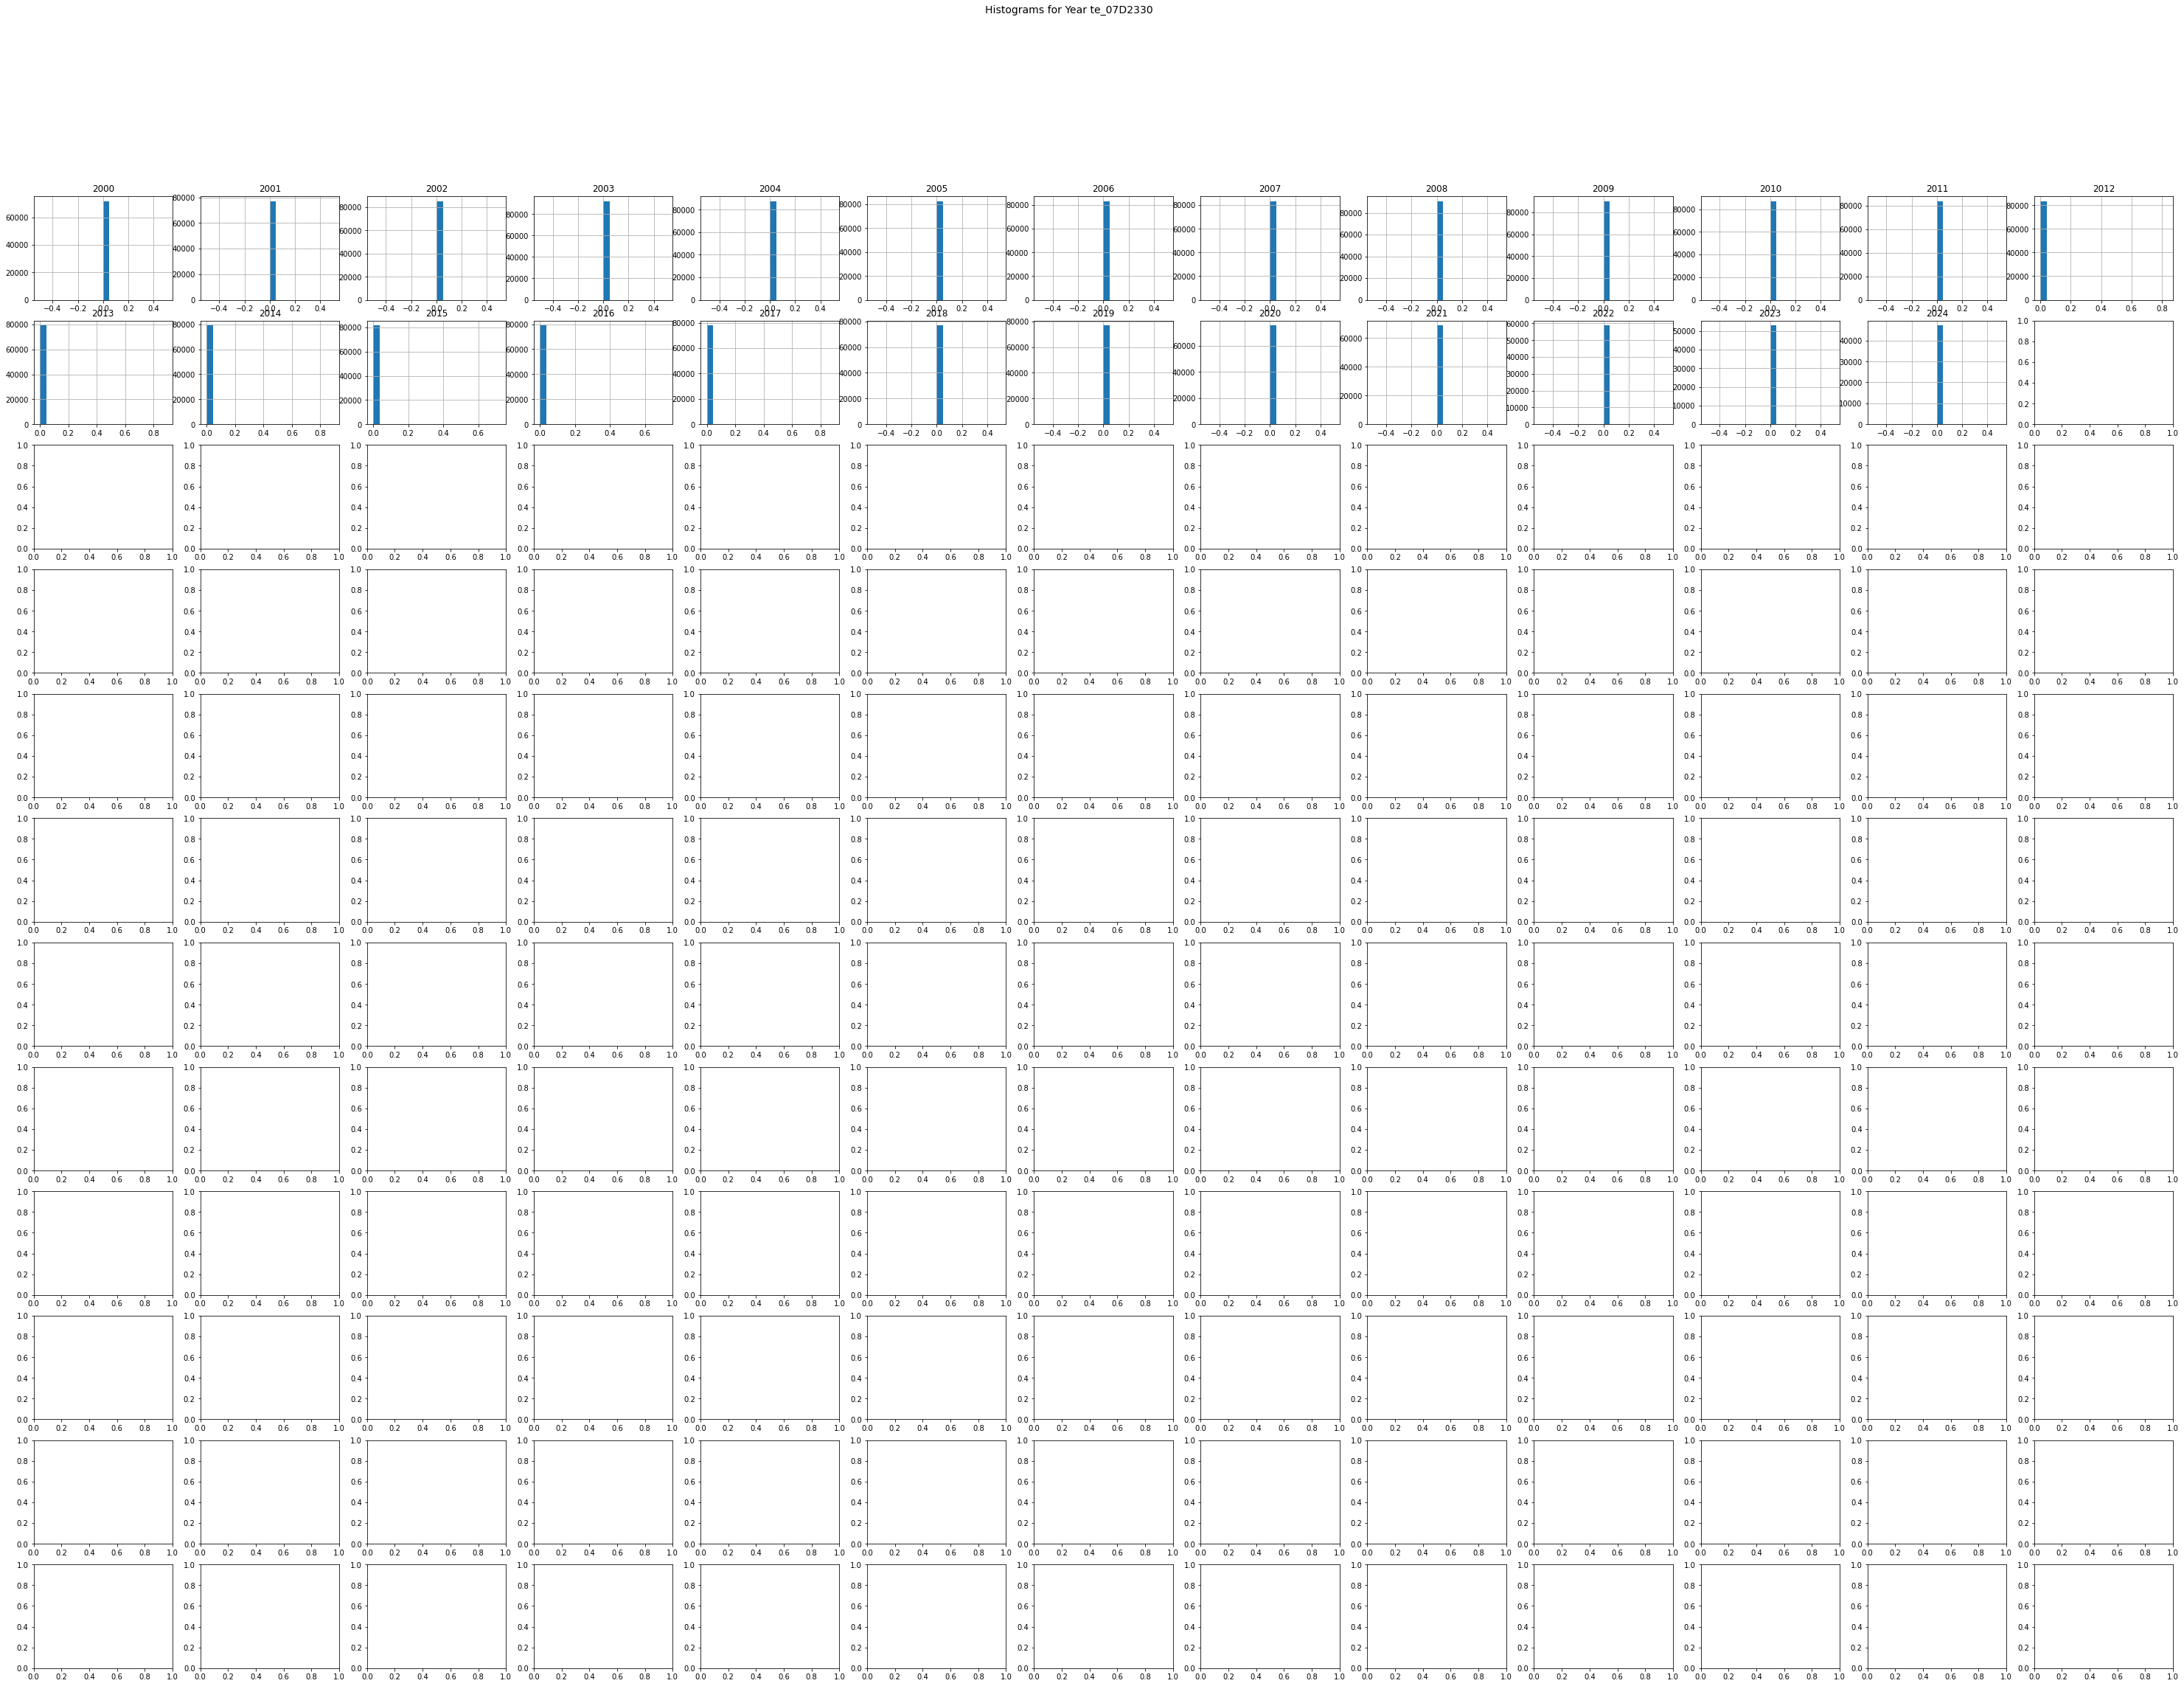

te_07T1418


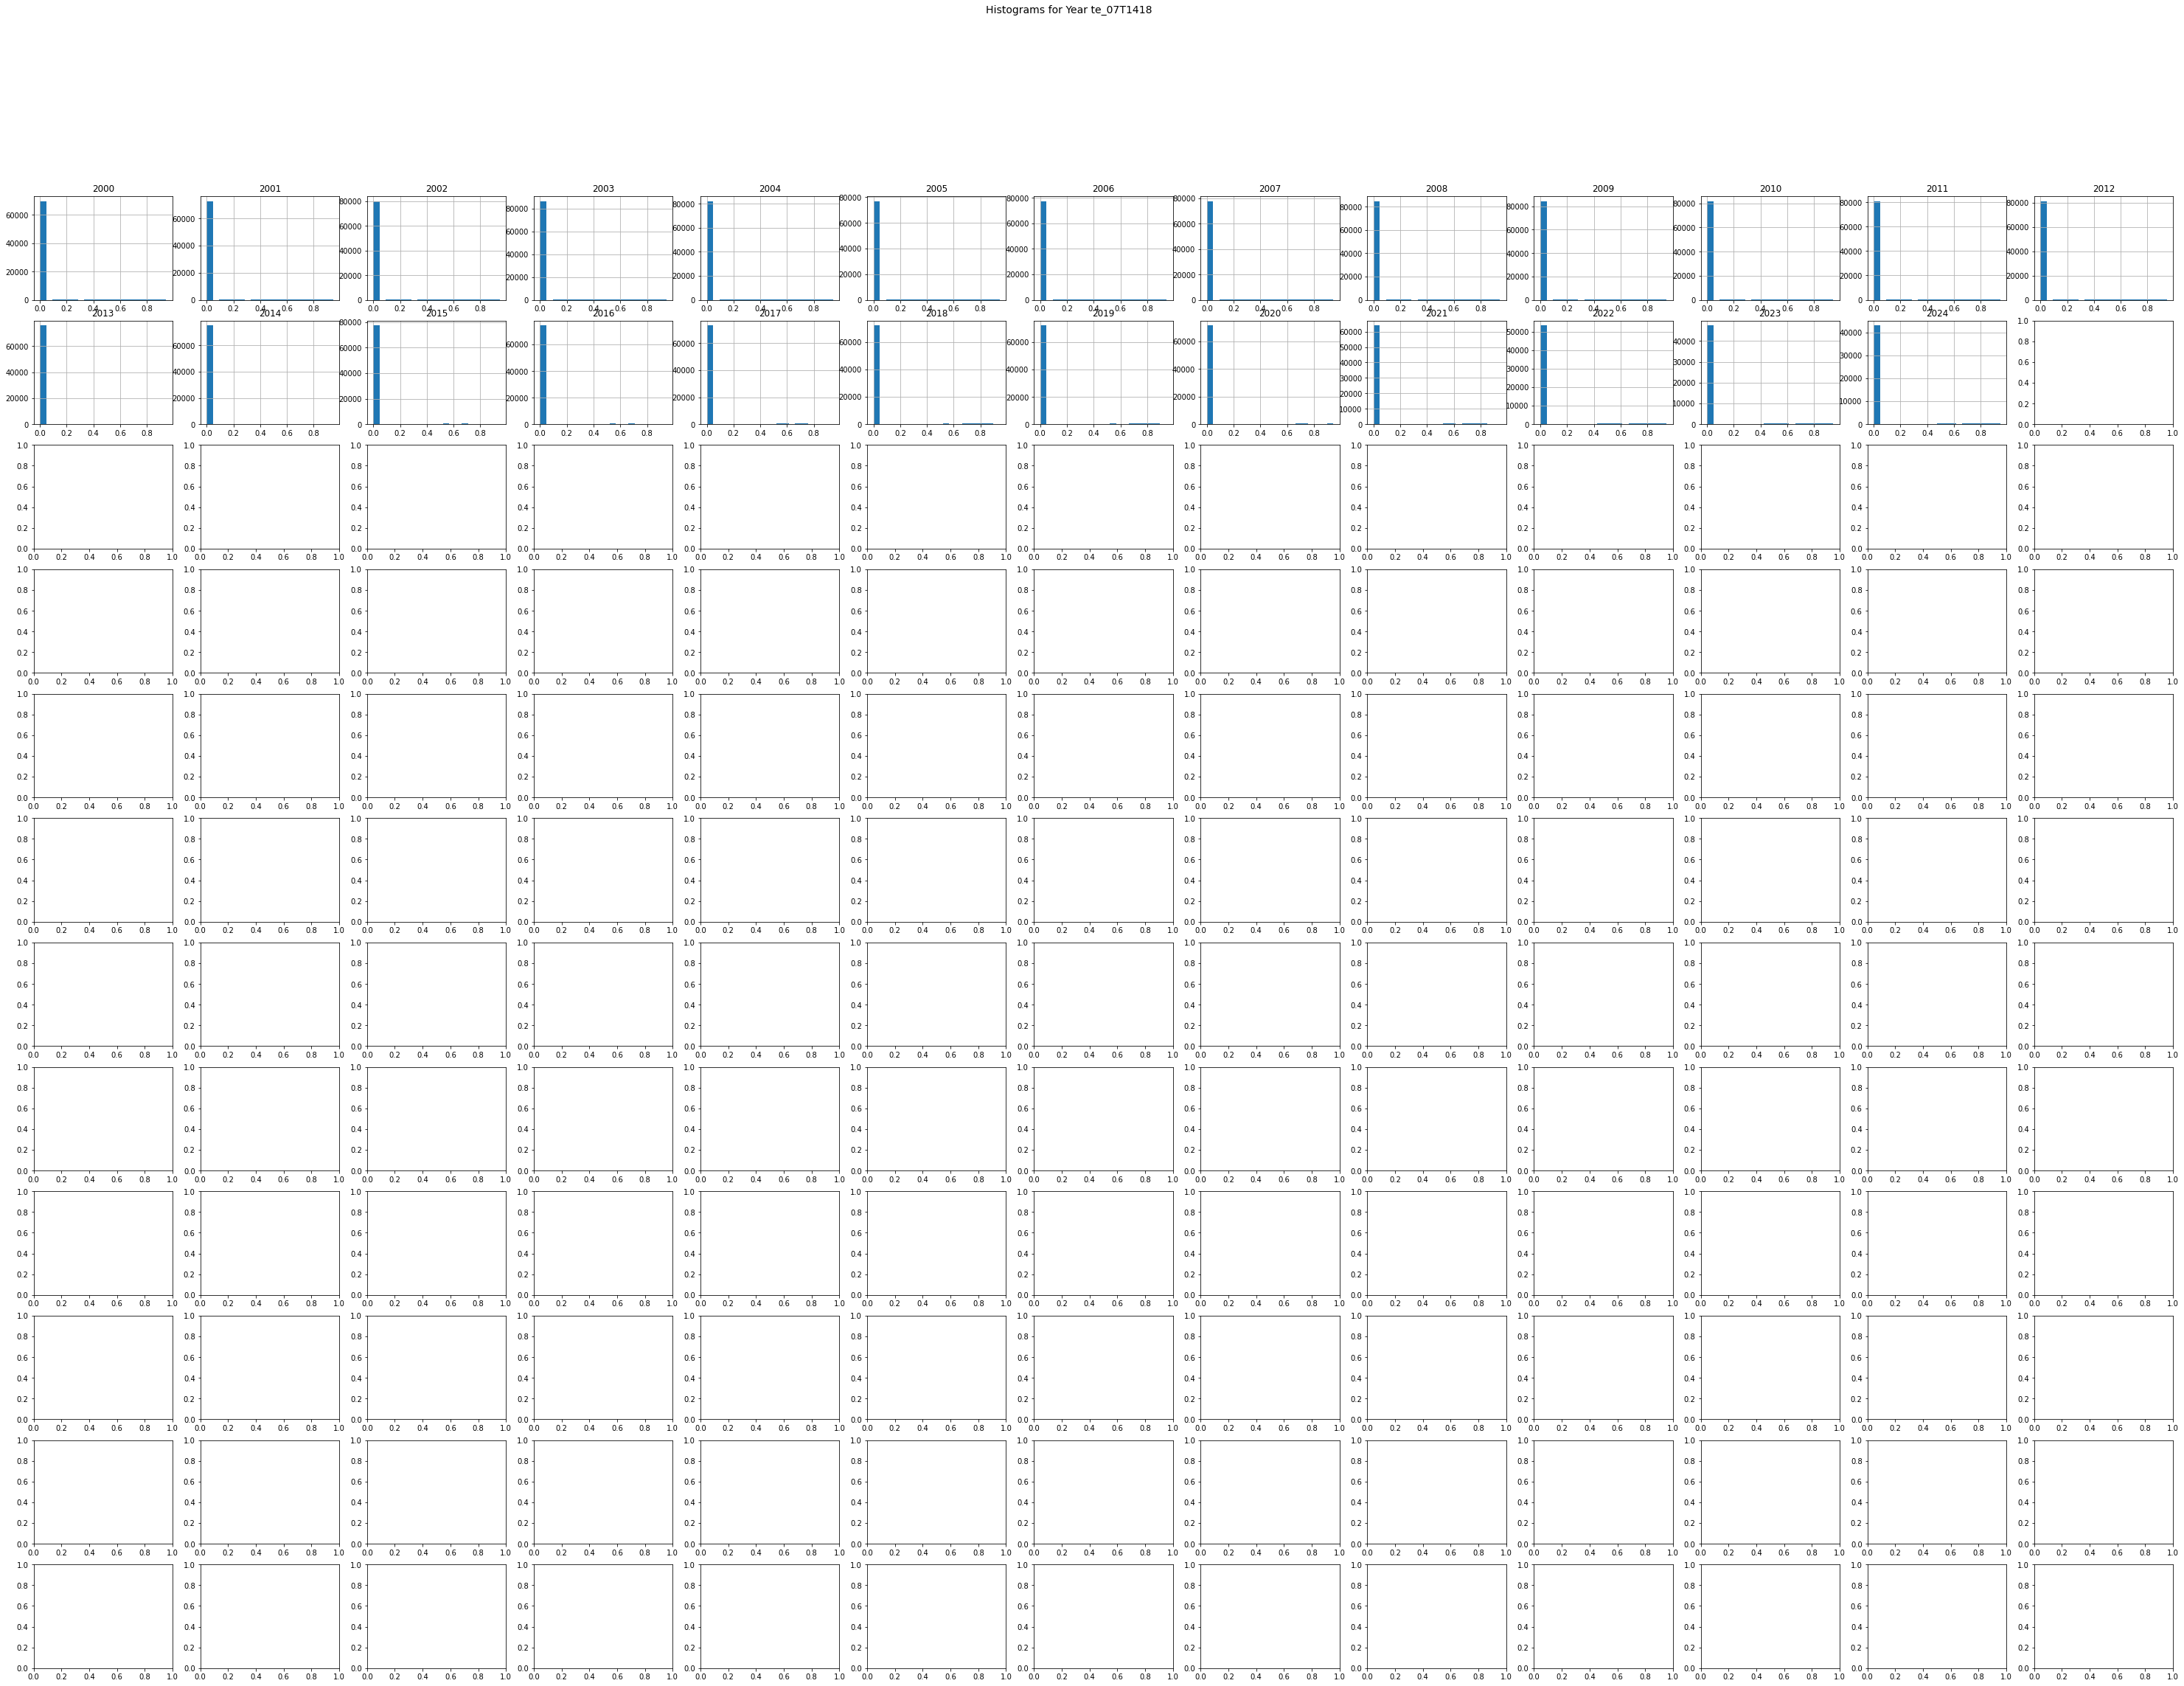

te_05T1418


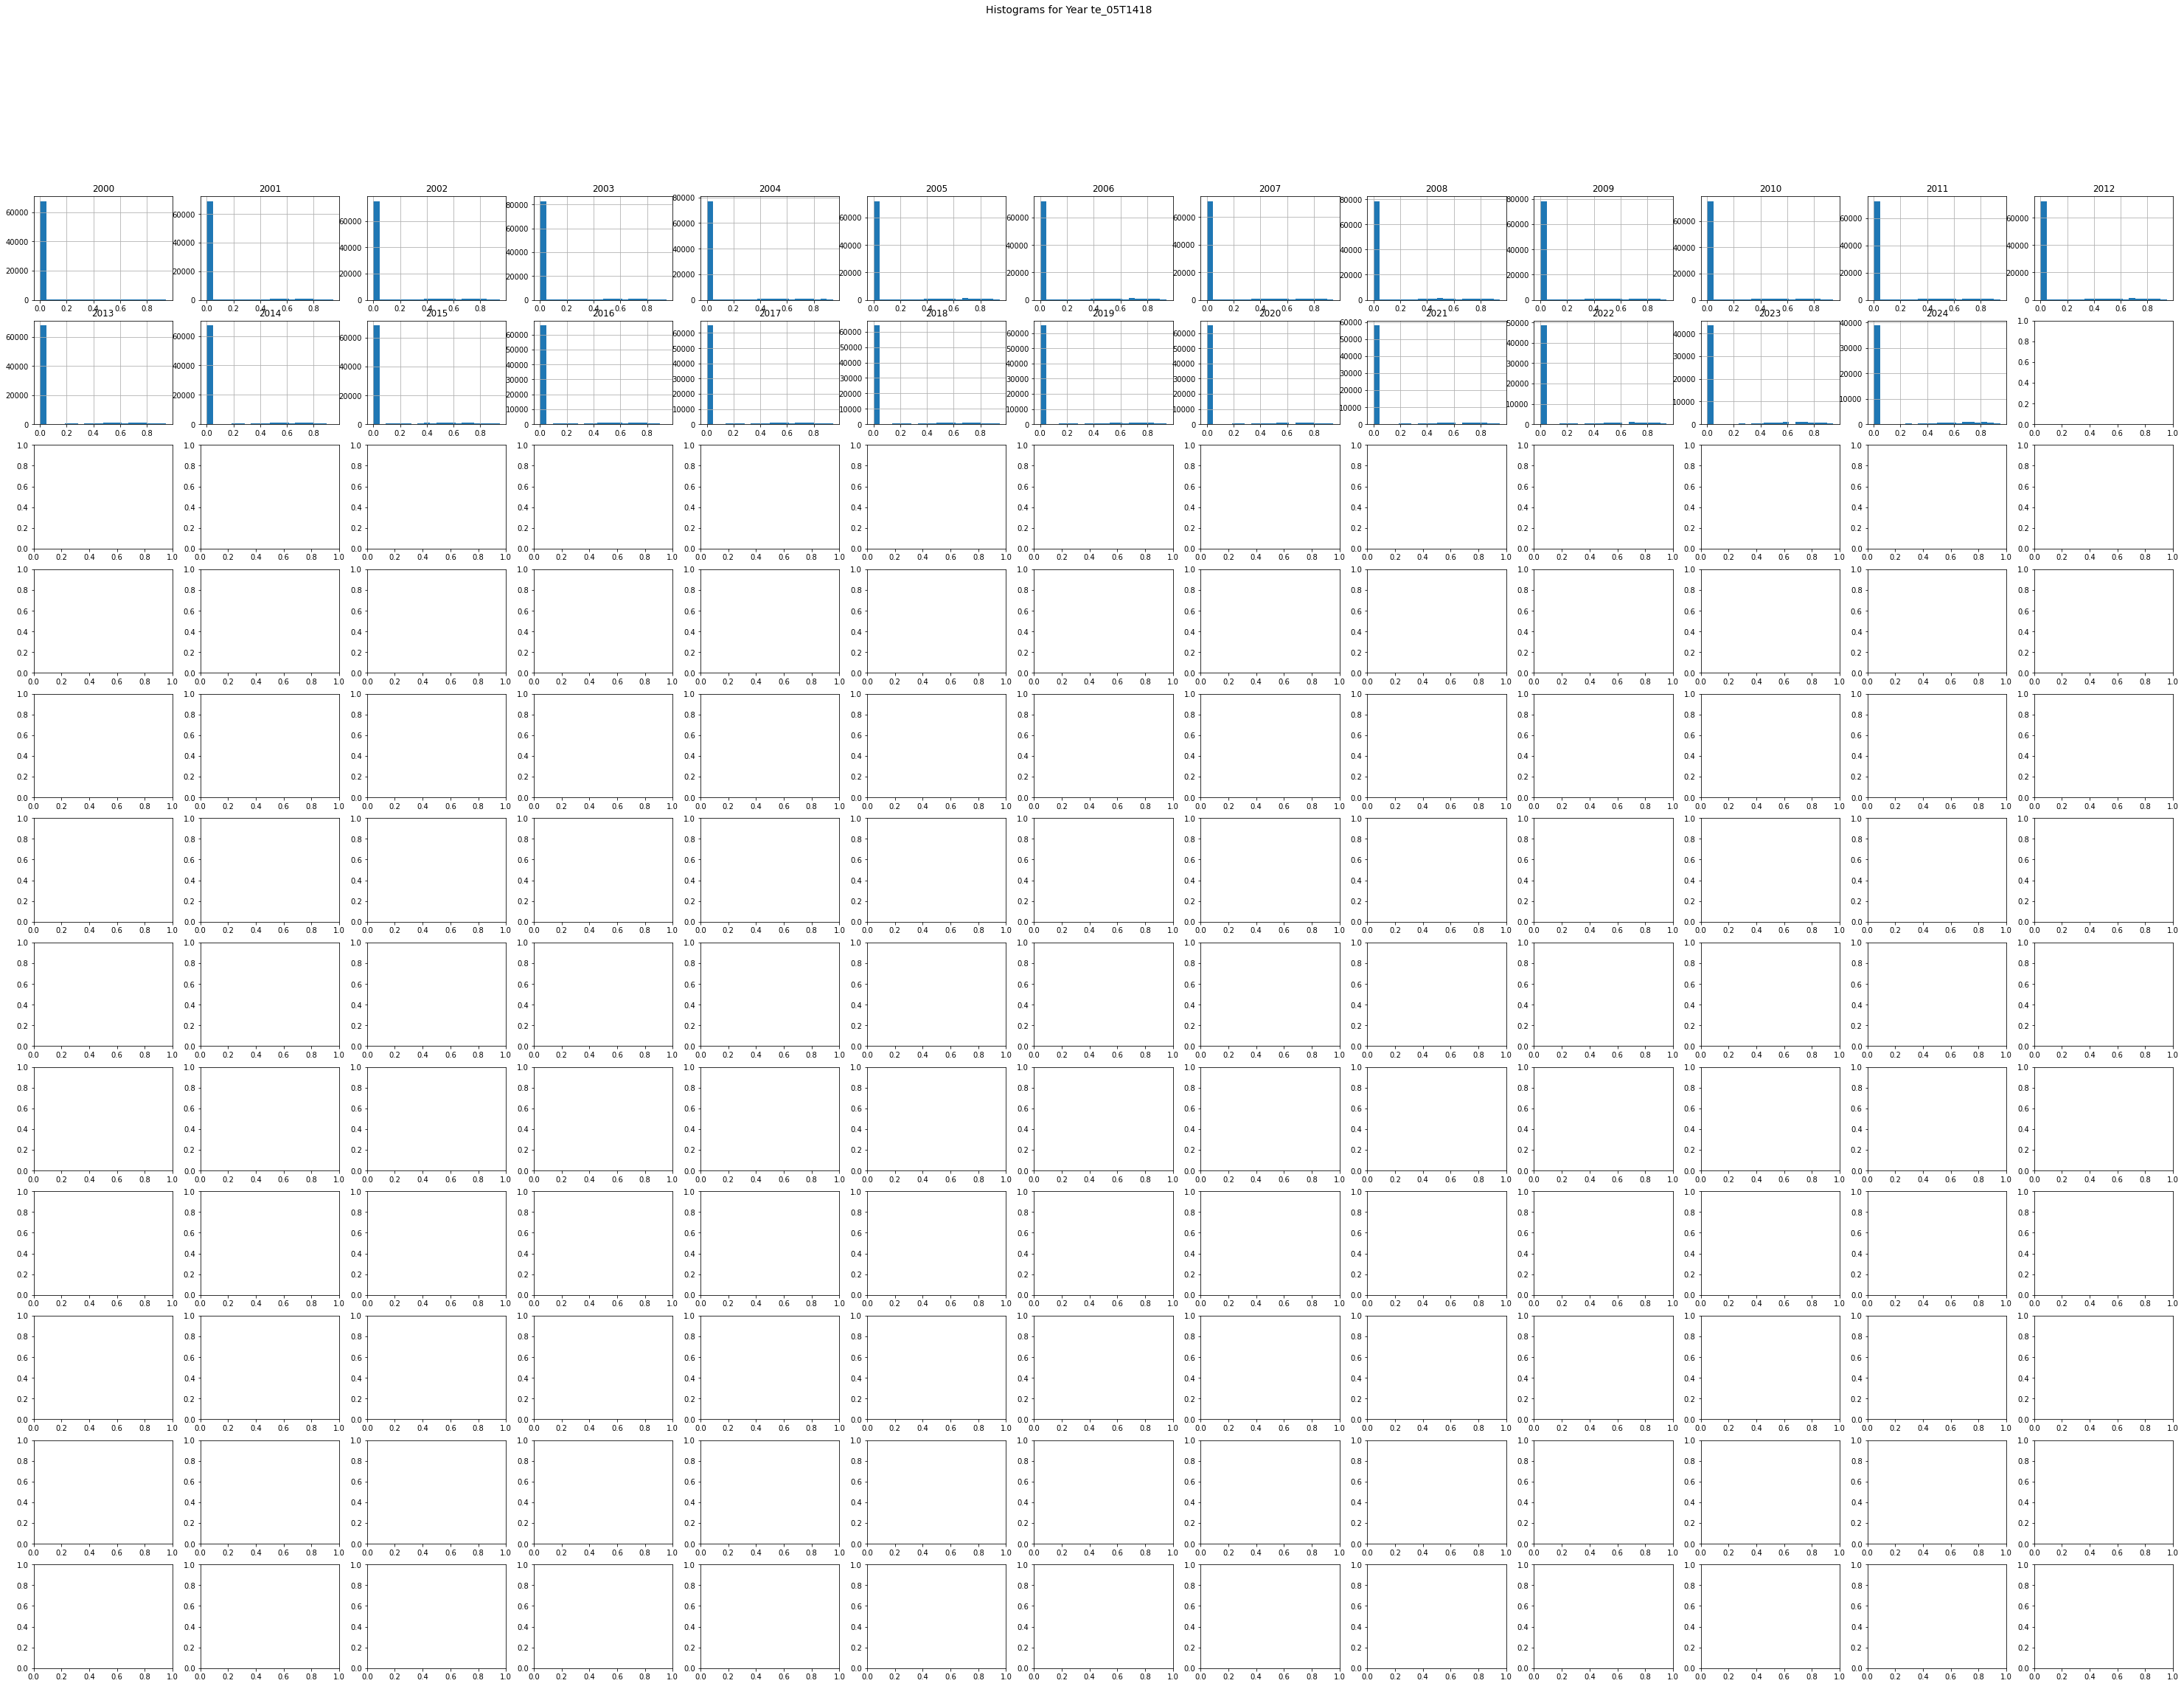

te_06T1418


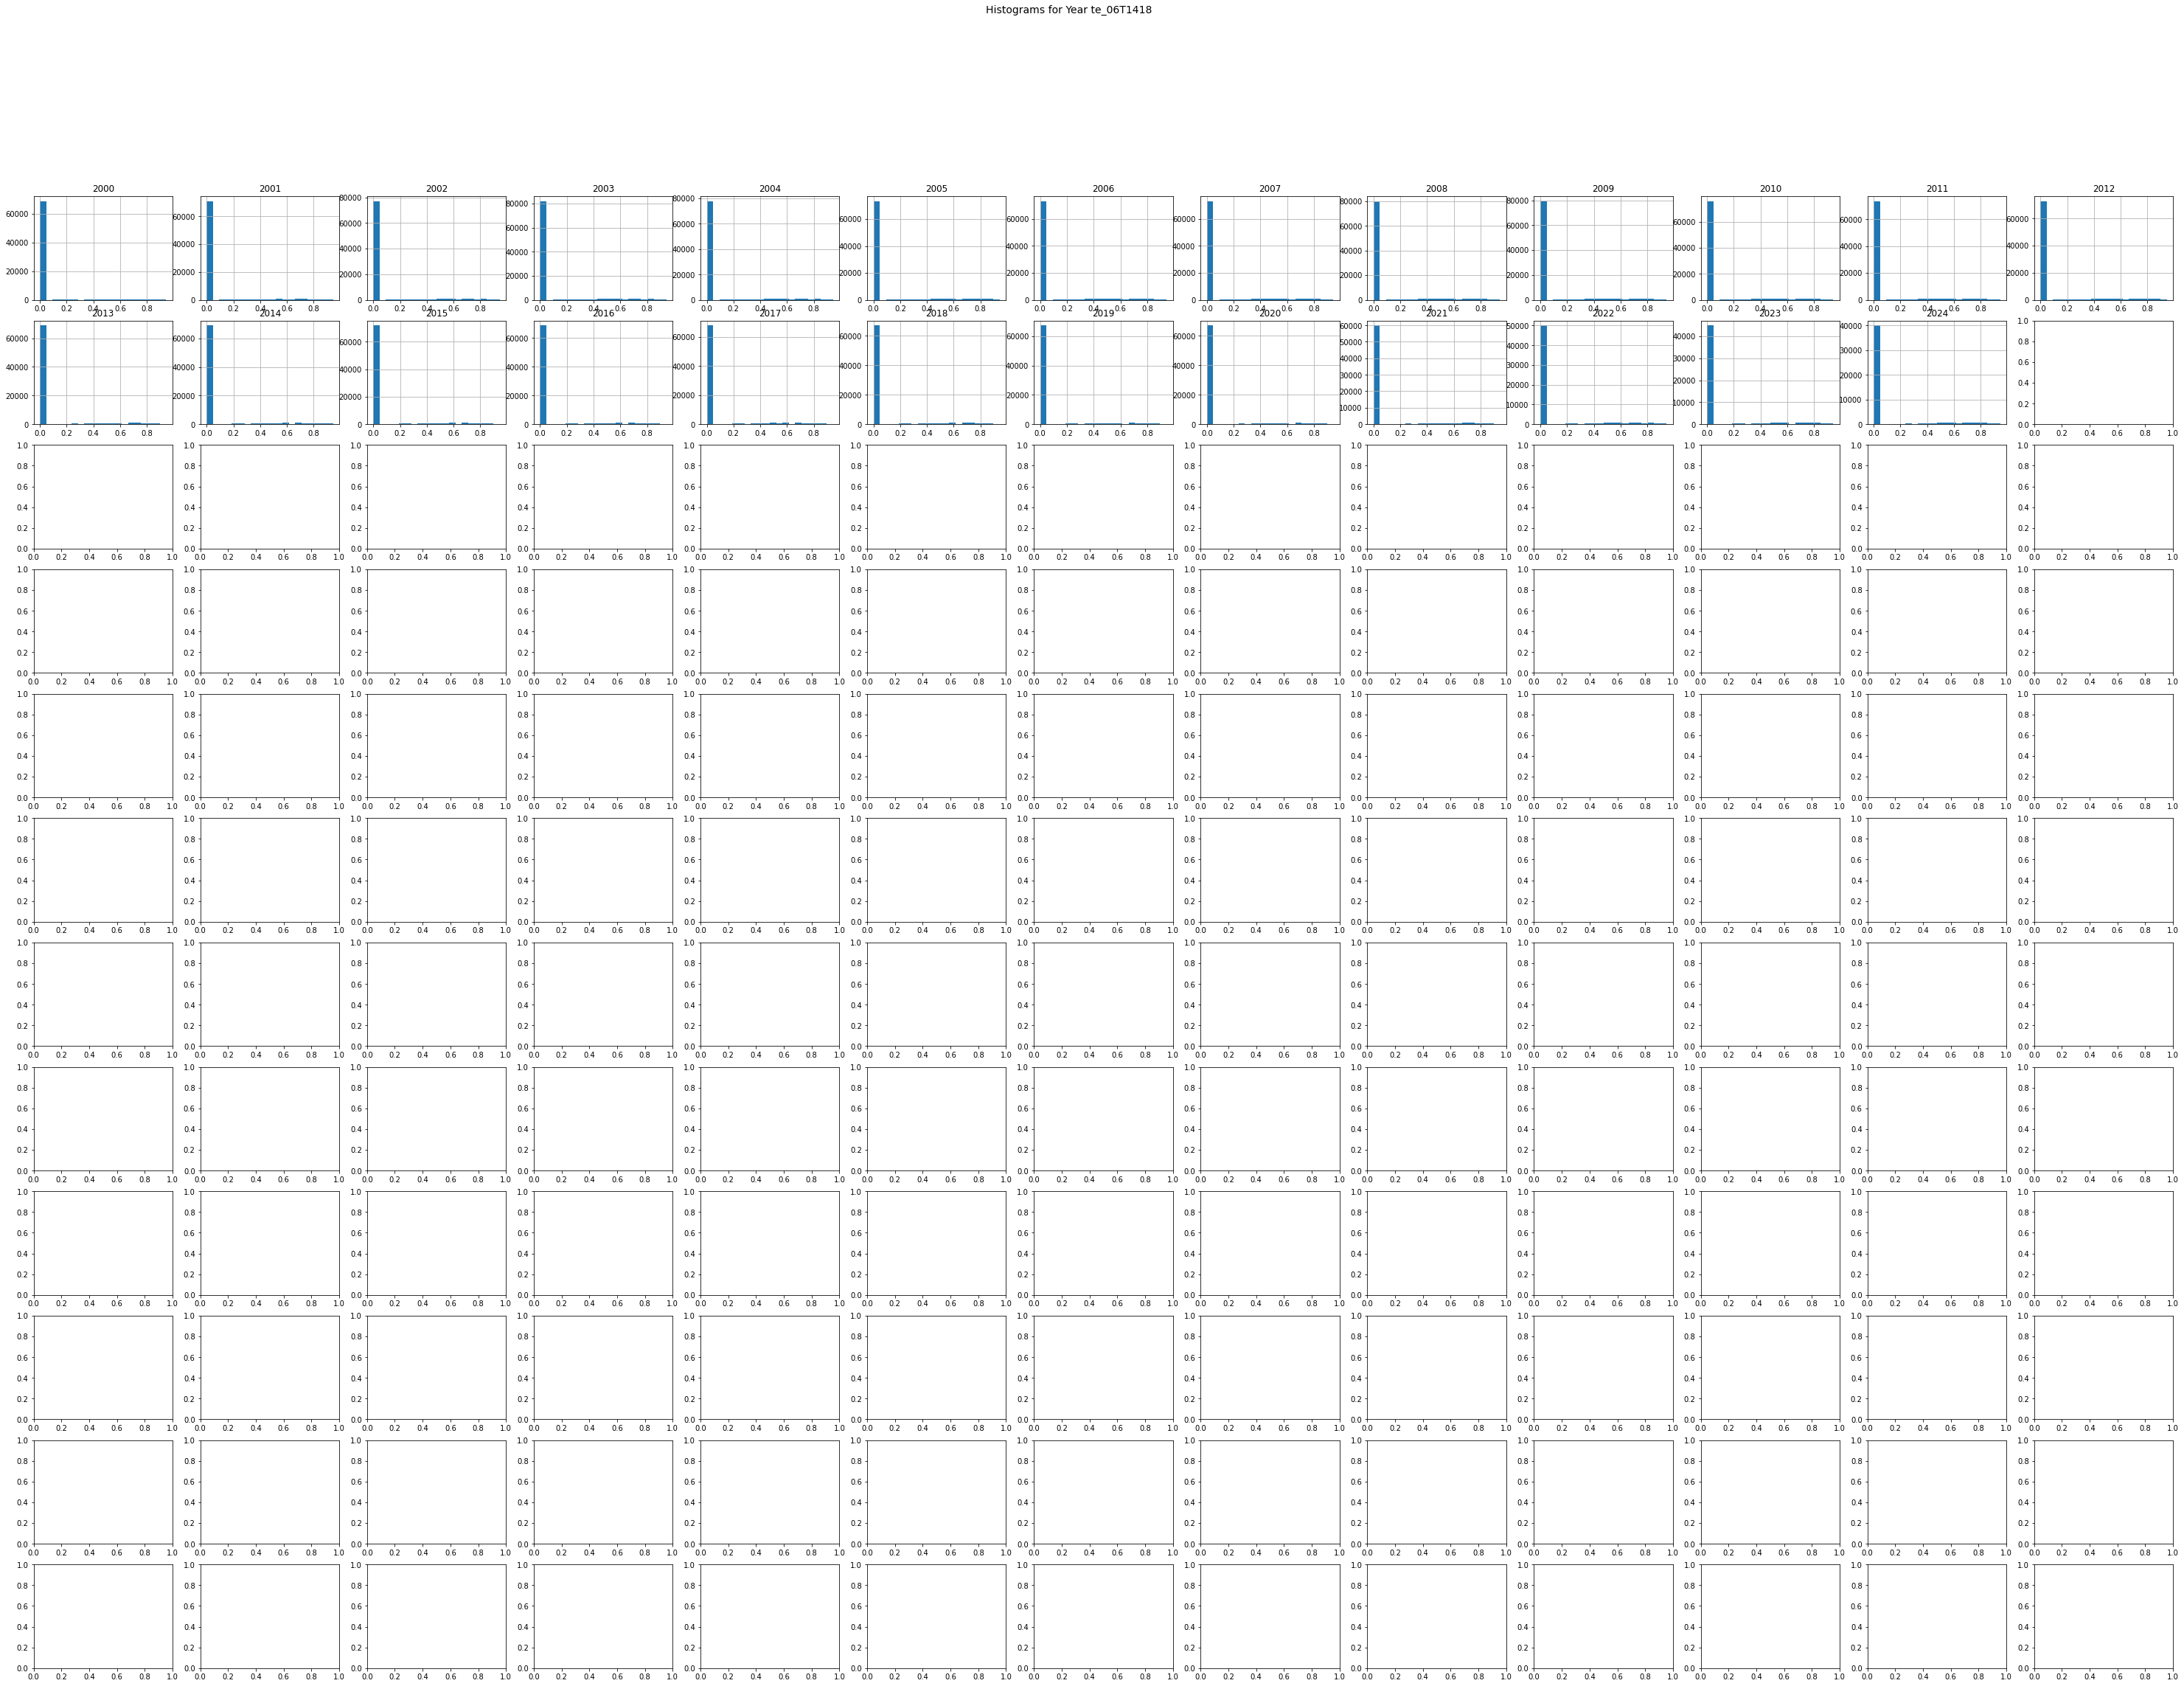

te_99D1418


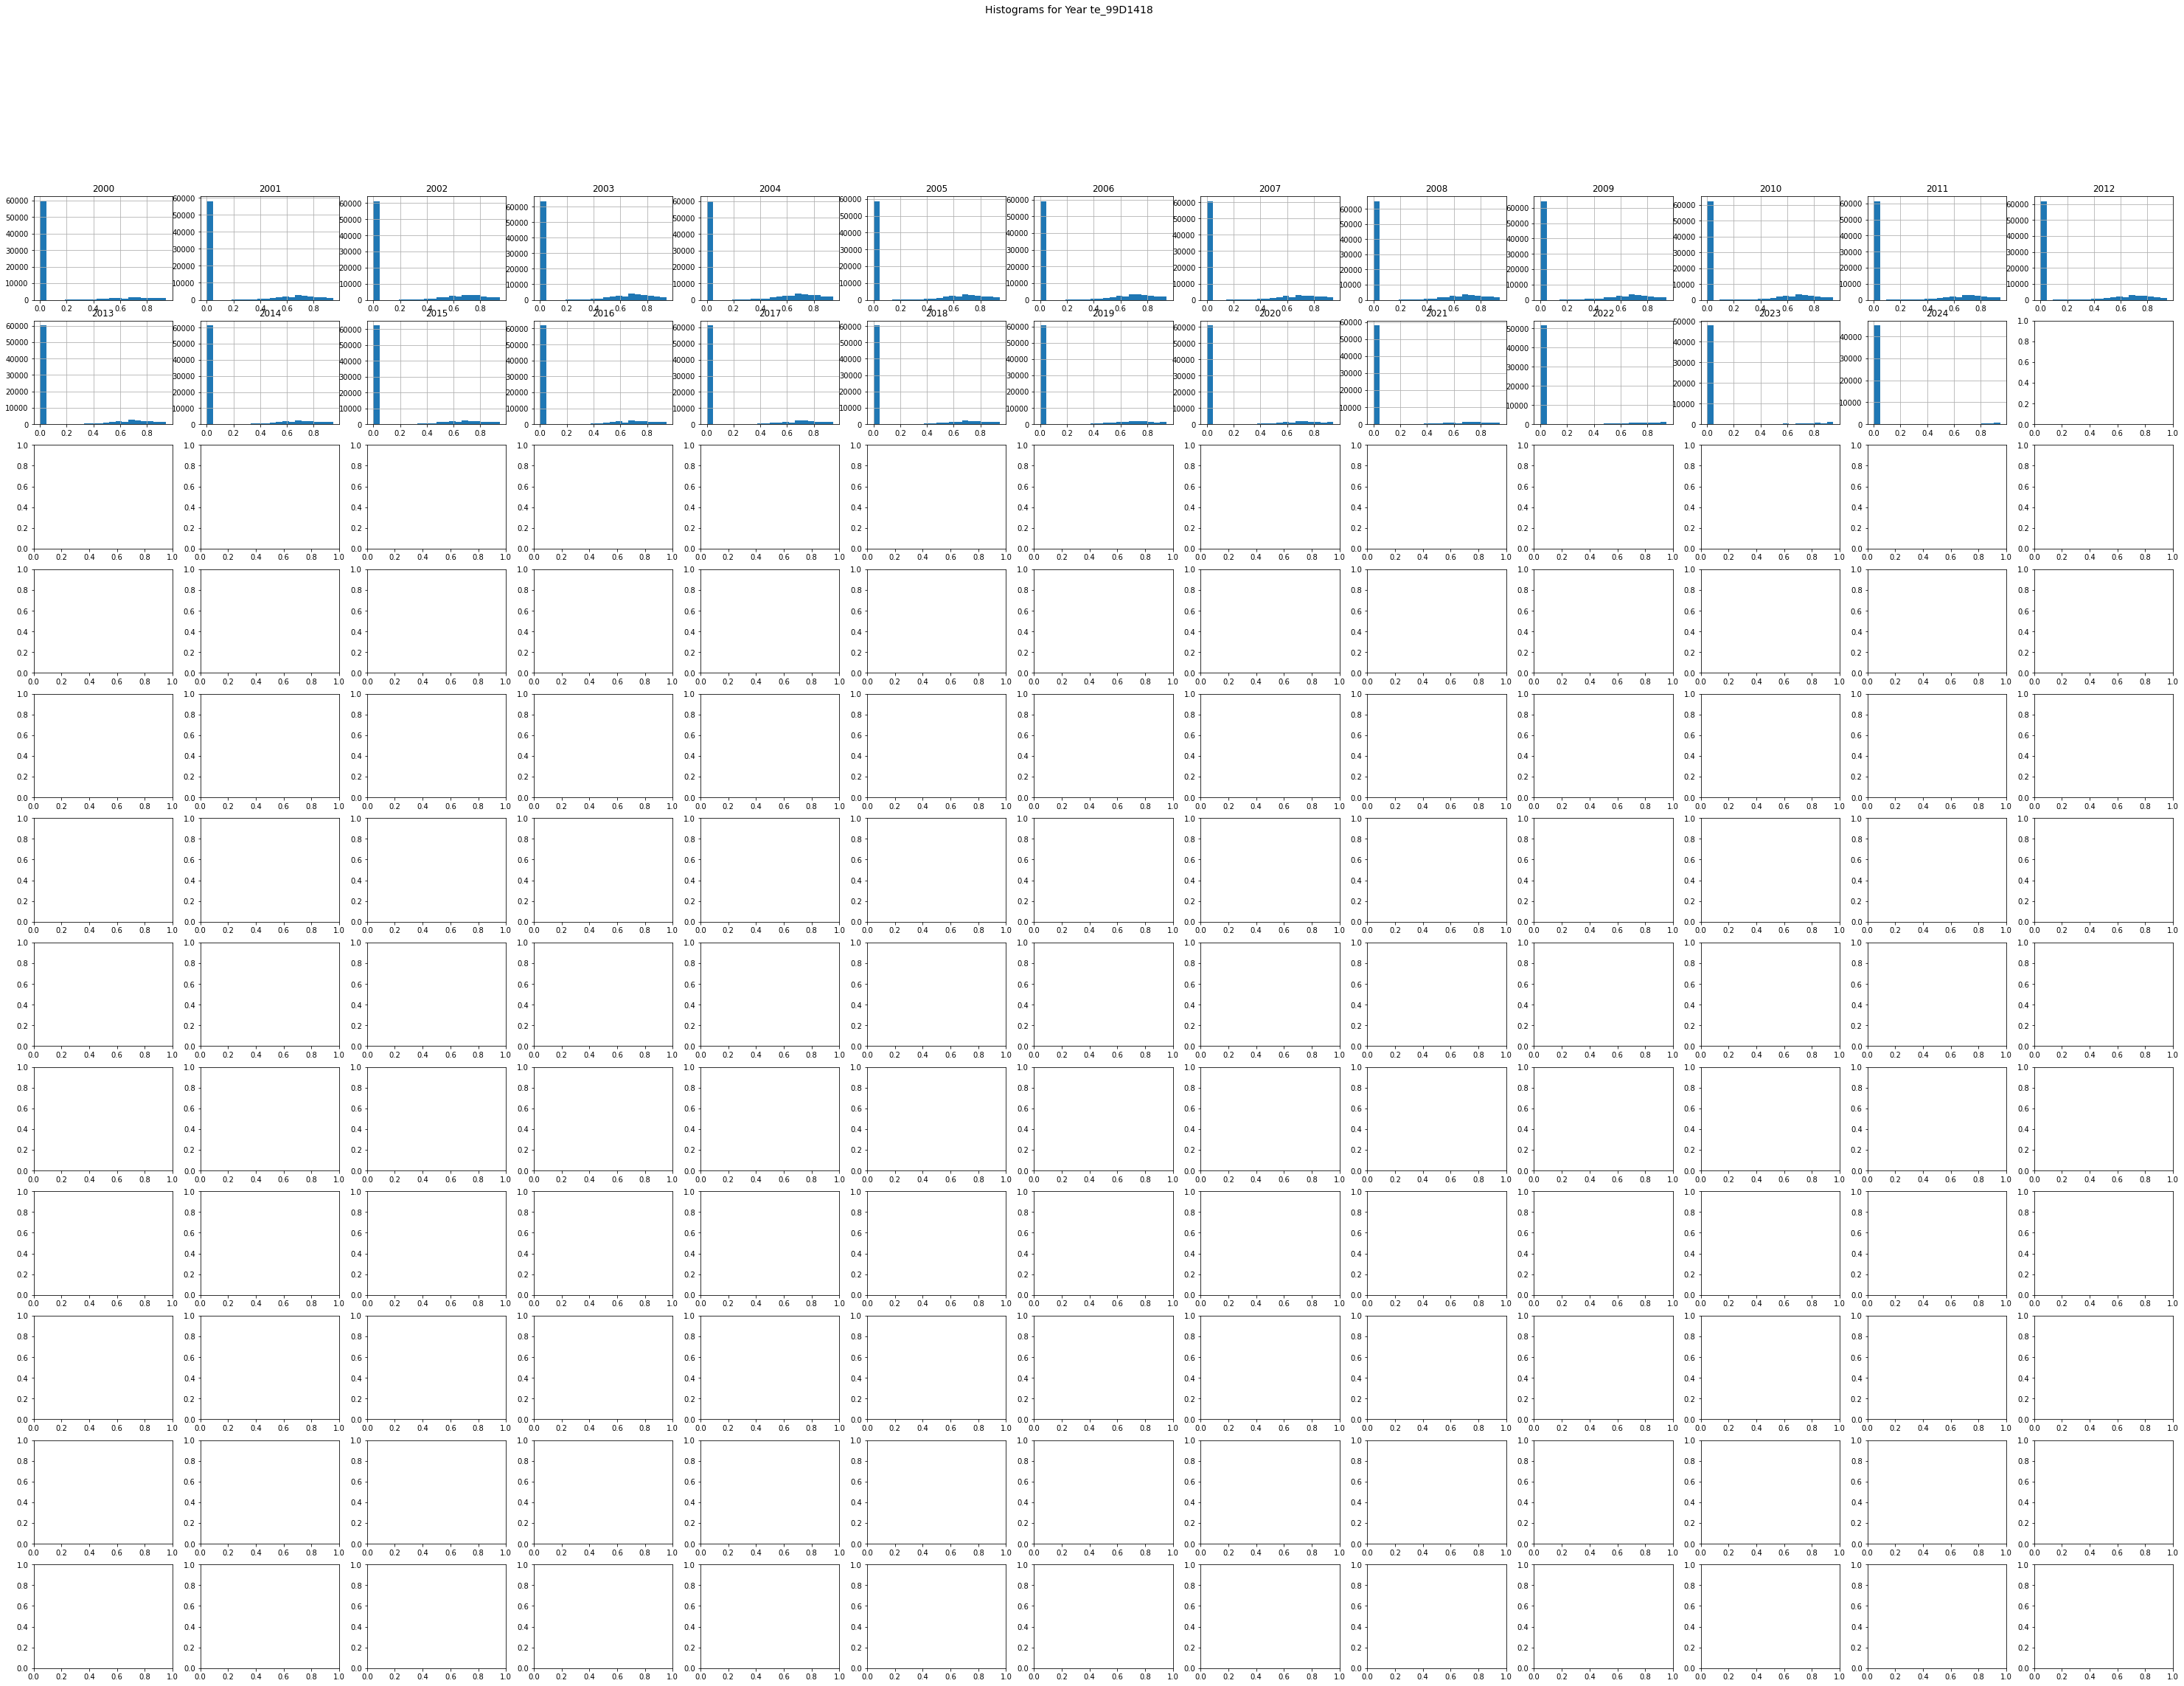

te_06D2330


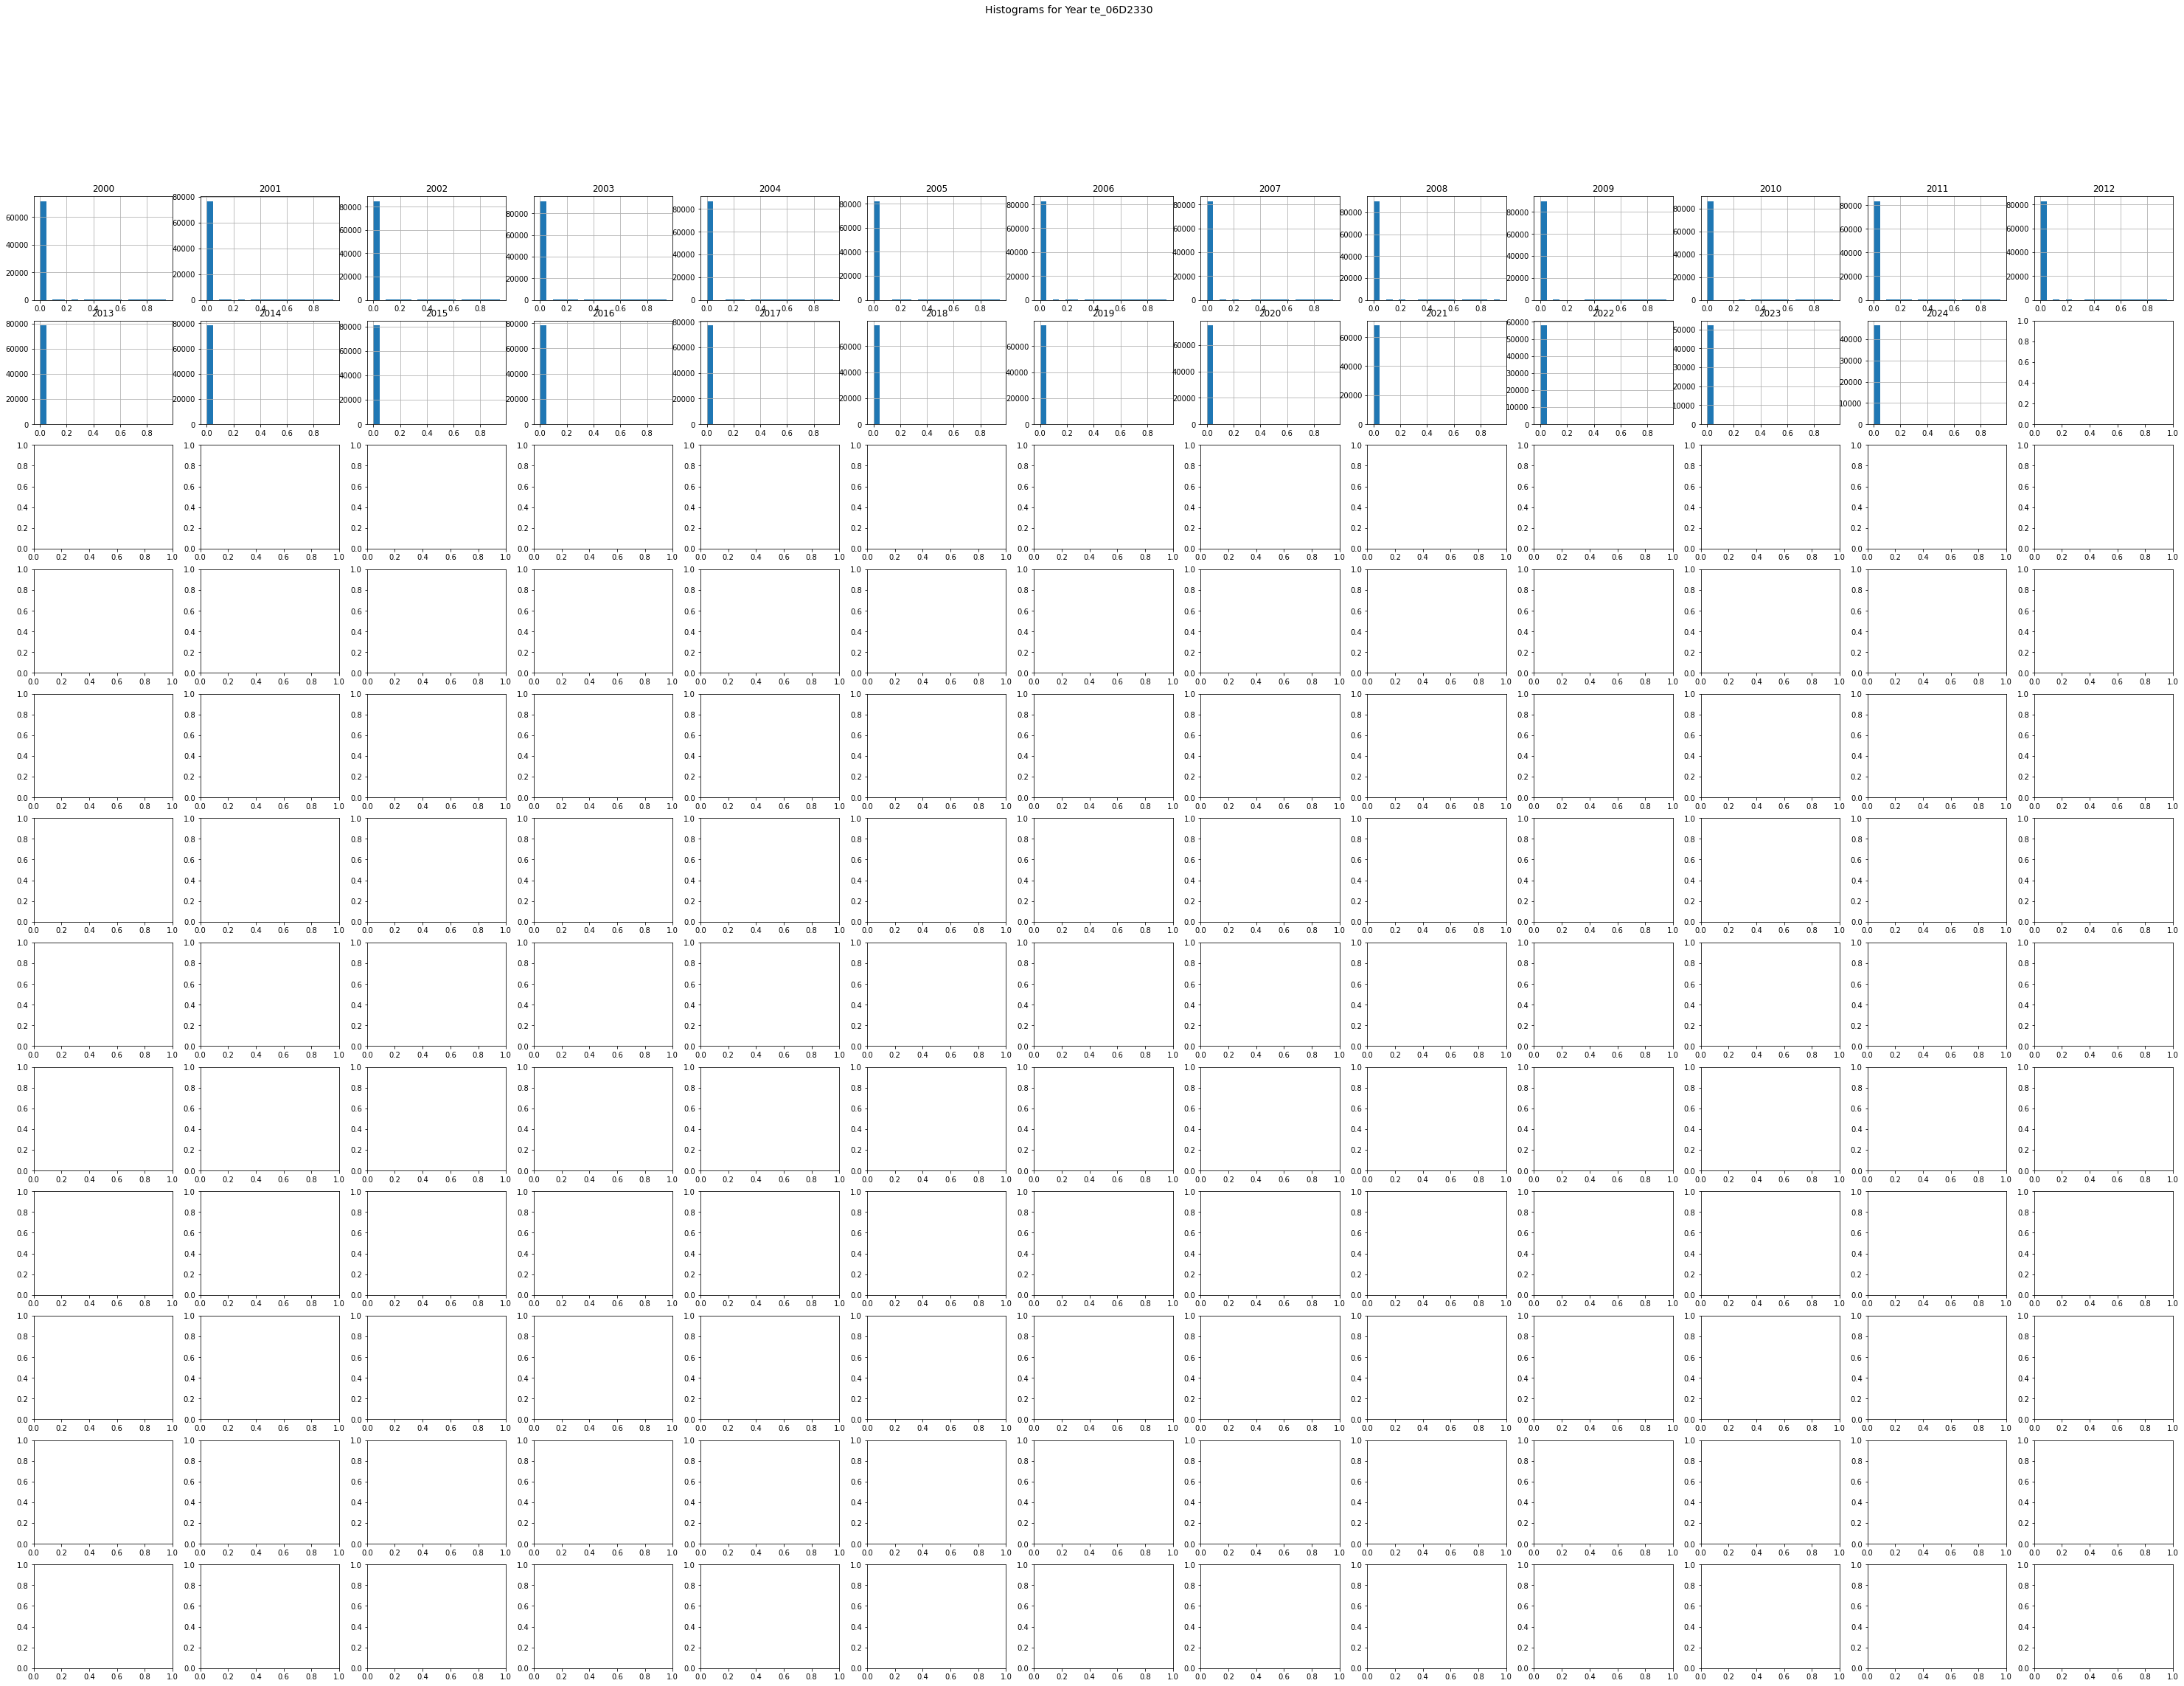

te_99T1418


In [ ]:
dict_results = k_a_util.pivot_statistics_by_column2(dict_statistics)
# ヒストグラムの作成 (グラフの行数、列数、解像度を適宜変更)
k_a_util.plot_histograms(dict_results, rows=12, cols=13, dpi=72)